In [1]:
import os
import pandas as pd

In [2]:
from numpy.random import normal

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
os.chdir(os.path.join(os.getcwd(),'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.transitize import *

In [6]:
import json
from ExMAS.utils import *

In [7]:
from ExMAS.transitize import visualizations

In [8]:
from ExMAS.transitize import visualizations
from ExMAS.transitize import analysis
inData = analysis.load_results(PATH ='transit_results/pol_godziny', EXP_NAME = 'pol_godziny')

In [9]:
params = ExMAS.utils.get_config('ExMAS/data/configs/transit.json')  # load the default
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [12]:
#inData = visualizations.prep_results(PATH='ams', inData = inData)
inData = analysis.make_report(inData)
inData.transitize.report

0             1             2             3
d2d                       NaN  1.345000e+03  1.184000e+03  1.065000e+03
dest_walk_time       0.000000  0.000000e+00  3.914700e+04  6.774600e+04
fare             11848.803000  9.102147e+03  8.702988e+03  8.053174e+03
ms                        NaN           NaN           NaN  2.250000e+02
nRides            2000.000000  1.597020e+05  1.602390e+05  1.009855e+06
orig_walk_time       0.000000  0.000000e+00  4.272800e+04  7.213400e+04
p                 2000.000000  6.550000e+02  6.450000e+02  6.510000e+02
s2s                       NaN           NaN  1.710000e+02  5.900000e+01
test                 1.000000  1.000000e+00  1.000000e+00  1.000000e+00
ttrav           986517.000000  1.304161e+06  1.217569e+06  1.051354e+06
u_pax            15289.841767  1.463544e+04  1.437616e+04  1.329858e+04
u_veh           986517.000000  6.448450e+05  6.338729e+05  6.164009e+05
efficiency          43.238678  5.081489e+01  4.942751e+01  4.703339e+01
occupancy            1.000000  1.529851e+00  1.556333e+00  1.600447e+00

In [13]:
inData.transitize.keys()

odict_keys(['requests', 'rm', 'rides', 'report'])

In [35]:
rides = inData.transitize.rides
rides = rides[(rides.kind=='ms') & (rides.solution_3 ==1)]
rides['degree'] = rides.indexes.apply(len)
rides = rides[rides.degree >=9]
rides.index

Int64Index([472436, 612278, 721808, 785769], dtype='int64')

In [38]:
#for ride_index in rides.index.values:
#    print(ride_index)
#    visualizations.plot_ms(inData, ride_index, level = 3, title = 'hyper-pooled ride')

In [39]:
ride_index = rides.index[2]
rides = inData.transitize.rides
requests = inData.transitize.requests

ride = inData.transitize.rides.loc[ride_index]
try:
    ride['high_level_indexes'] = json.loads(ride['high_level_indexes'])
except:
    pass
ride['origins'] = requests.loc[ride.indexes].origin.values
ride['destinations'] = requests.loc[ride.indexes].destination.values

private_rides = rides[rides.kind=='p'][rides['index'].isin(ride.indexes)]

s2s_rides = rides.loc[ride.high_level_indexes]

d2d_rides = rides.loc[s2s_rides.d2d_reference.values]

In [112]:
params.speeds.walk

2

In [123]:
table= private_rides[['u_pax','ttrav']]
table.ttrav = (table.ttrav/60).round(2)
table.u_pax = (table.u_pax).round(2)
reqs = inData.transitize.requests.loc[table.index]
table['walk_PT']=((reqs.duration-reqs.transitTime-reqs.waitingTime)/60).round(2)
table['time_PT']=(reqs.duration/60).round(2)
table

u_pax  ttrav  walk_PT  time_PT
776   10.26  12.23    10.23    31.78
811   19.33  20.65     9.73    50.83
1106  18.97  20.12     6.78    39.75
1162  14.09  13.93     6.92    33.67
1385  15.53  16.82    12.43    43.87
1401  16.06  16.27    18.67    47.48
1470  13.52  14.05    14.38    35.22
1729  12.82  12.82    13.93    35.23
1865   3.08   3.63    12.65    18.38
1995   3.84   4.72     9.55    15.28

In [135]:
rm = inData.transitize.rm
rm[rm.traveller.isin([811,1385])]

ride  traveller  degree  dist   ttrav  delay          u  \
(811, 811)        811        811     1.0  9912  1239.0    0.0  19.326042   
(1385, 1385)     1385       1385     1.0  8076  1009.0    0.0  15.531588   
(2962, 811)      2962        811     2.0  9912  1239.0  -61.0  17.625631   
(3013, 811)      3013        811     2.0  9912  1239.0  -63.0  17.407658   
(3238, 1385)     3238       1385     2.0  8076  1009.0  -73.0  14.953252   
...               ...        ...     ...   ...     ...    ...        ...   
1385          1009850       1385    12.0  8076  1188.0  188.0  10.889834   
1385          1009851       1385    12.0  8076  1188.0  188.0  10.889834   
1385          1009852       1385    12.0  8076  1188.0  188.0  10.889834   
1385          1009853       1385    12.0  8076  1188.0  188.0  10.889834   
1385          1009854       1385    12.0  8076  1188.0  188.0  10.889834   

              orig_walk_time  dest_walk_time       VoT  ...  destination  \
(811, 811)               NaN             NaN  0.003598  ...     46370952   
(1385, 1385)             NaN             NaN  0.003387  ...     46347931   
(2962, 811)              NaN             NaN  0.003598  ...     46370952   
(3013, 811)              NaN             NaN  0.003598  ...     46370952   
(3238, 1385)             NaN             NaN  0.003387  ...     46347931   
...                      ...             ...       ...  ...          ...   
1385                   316.0           450.0  0.003387  ...     46347931   
1385                   316.0           450.0  0.003387  ...     46347931   
1385                   316.0           450.0  0.003387  ...     46347931   
1385                   316.0           450.0  0.003387  ...     46347931   
1385                   316.0           450.0  0.003387  ...     46347931   

              treq  kind s2s_reference  door_departure       fare  solution_0  \
(811, 811)     714     p           NaN             NaN  14.868000           1   
(1385, 1385)  1307     p           NaN             NaN  12.114000           1   
(2962, 811)    714   d2d           NaN             NaN  10.932353           0   
(3013, 811)    714   d2d           NaN             NaN  10.932353           0   
(3238, 1385)  1307   d2d           NaN             NaN   8.907353           0   
...            ...   ...           ...             ...        ...         ...   
1385          1307    ms      160133.0          1495.0   3.028500           0   
1385          1307    ms      160133.0          1495.0   3.028500           0   
1385          1307    ms      160133.0          1495.0   3.028500           0   
1385          1307    ms      160133.0          1495.0   3.028500           0   
1385          1307    ms      160133.0          1495.0   3.028500           0   

              solution_1  solution_2  solution_3  
(811, 811)             0           0           0  
(1385, 1385)           0           0           0  
(2962, 811)            0           0           0  
(3013, 811)            0           0           0  
(3238, 1385)           0           0           0  
...                  ...         ...         ...  
1385                   0           0           0  
1385                   0           0           0  
1385                   0           0           0  
1385                   0           0           0  
1385                   0           0           0  

[731946 rows x 21 columns]

In [181]:
table= pd.DataFrame(index=private_rides.index)
rm = inData.transitize.rm
rm = rm[rm.traveller.isin(table.index.values)]
for level in[0,1,2,3]:
    r = rm[rm['solution_{}'.format(level)]==1]
    r = r.set_index('traveller')
    
    table['u_{}'.format(level)]=-r.u.round(2)
reqs = inData.transitize.requests.loc[table.index]
reqs = analysis.PT_utility(reqs,params)
table['u_PT']=-(reqs.u_PT).round(2)


for level in[0,1,2,3]:
    r = rm[rm['solution_{}'.format(level)]==1]
    r = r.set_index('traveller')
    table['time_{}'.format(level)]=(r.ttrav/60).round(2)
table['time_PT']=(reqs.duration/60).round(2)
for level in[0,1,2,3]:
    r = rm[rm['solution_{}'.format(level)]==1]
    r = r.set_index('traveller')
    table['walk_{}'.format(level)]=((r.orig_walk_time+r.dest_walk_time)/60).round(2)
table['walk_2']=table['walk_3']
table['walk_PT']=((reqs.duration-reqs.transitTime-reqs.waitingTime)/60).round(2)    
for level in[0,1,2,3]:
    r = rm[rm['solution_{}'.format(level)]==1]
    r = r.set_index('traveller')
    table['fare_{}'.format(level)]=r.fare.round(2)
table['fare_PT']=reqs.PT_fare.round(2)
    
    
table = table.fillna(0)
display(table)
print(table.to_latex())

u_0    u_1    u_2    u_3   u_PT  time_0  time_1  time_2  time_3  \
776  -10.26  -9.78  -9.72  -7.42  -6.46   12.23   12.23   12.23   15.63   
811  -19.33 -17.87 -19.15 -14.12 -15.09   20.65   20.65   20.65   26.88   
1106 -18.97 -18.44 -18.42 -12.49 -14.52   20.12   20.12   20.12   26.88   
1162 -14.09 -13.98 -14.06 -13.17 -15.69   13.93   13.93   12.43   15.63   
1385 -15.53 -15.48 -14.66 -10.29 -12.53   16.82   16.82   16.82   18.90   
1401 -16.06 -15.76 -15.98 -11.71 -16.66   16.27   16.27   16.27   18.90   
1470 -13.52 -13.00 -12.98 -10.82 -11.60   14.05   14.05   12.43   13.68   
1729 -12.82 -12.42 -12.42  -9.36 -13.17   12.82   12.82   12.82   13.68   
1865  -3.08  -2.92  -2.89  -3.55  -3.98    3.63    3.63    3.48    3.68   
1995  -3.84  -3.33  -3.60  -2.71  -2.92    4.72    4.72    3.48    3.68   

      time_PT  walk_0  walk_1  walk_2  walk_3  walk_PT  fare_0  fare_1  \
776     31.78     0.0     0.0    6.82    6.82    10.23    8.82    6.48   
811     50.83     0.0     0.0   10.35   10.35     9.73   14.87   10.93   
1106    39.75     0.0     0.0    1.82    1.82     6.78   14.49   10.66   
1162    33.67     0.0     0.0    2.23    2.23     6.92   10.04    7.38   
1385    43.87     0.0     0.0   12.77   12.77    12.43   12.11    8.91   
1401    47.48     0.0     0.0    9.68    9.68    18.67   11.72    8.62   
1470    35.22     0.0     0.0   13.15   13.15    14.38   10.12    7.44   
1729    35.23     0.0     0.0    4.37    4.37    13.93    9.23    6.79   
1865    18.38     0.0     0.0    9.92    9.92    12.65    2.62    1.93   
1995    15.28     0.0     0.0    7.65    7.65     9.55    3.40    2.50   

      fare_2  fare_3  fare_PT  
776     6.48    2.20     2.36  
811    10.93    3.72     3.59  
1106   10.66    3.62     2.93  
1162    3.41    2.51     2.61  
1385    8.91    3.03     2.98  
1401    8.62    2.93     2.81  
1470    3.44    2.53     2.31  
1729    6.79    2.31     2.34  
1865    0.89    0.66     1.36  
1995    1.16    0.85     1.36

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &    u\_0 &    u\_1 &    u\_2 &    u\_3 &   u\_PT &  time\_0 &  time\_1 &  time\_2 &  time\_3 &  time\_PT &  walk\_0 &  walk\_1 &  walk\_2 &  walk\_3 &  walk\_PT &  fare\_0 &  fare\_1 &  fare\_2 &  fare\_3 &  fare\_PT \\
\midrule
776  & -10.26 &  -9.78 &  -9.72 &  -7.42 &  -6.46 &   12.23 &   12.23 &   12.23 &   15.63 &    31.78 &     0.0 &     0.0 &    6.82 &    6.82 &    10.23 &    8.82 &    6.48 &    6.48 &    2.20 &     2.36 \\
811  & -19.33 & -17.87 & -19.15 & -14.12 & -15.09 &   20.65 &   20.65 &   20.65 &   26.88 &    50.83 &     0.0 &     0.0 &   10.35 &   10.35 &     9.73 &   14.87 &   10.93 &   10.93 &    3.72 &     3.59 \\
1106 & -18.97 & -18.44 & -18.42 & -12.49 & -14.52 &   20.12 &   20.12 &   20.12 &   26.88 &    39.75 &     0.0 &     0.0 &    1.82 &    1.82 &     6.78 &   14.49 &   10.66 &   10.66 &    3.62 &     2.93 \\
1162 & -14.09 & -13.98 & -14.06 & -13.17 & -15.69 &   13.93 &   13.93 &   12.43 &   15.63 &    33.67 

In [185]:
print(table.sum().to_frame().T.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &    u\_0 &     u\_1 &     u\_2 &    u\_3 &    u\_PT &  time\_0 &  time\_1 &  time\_2 &  time\_3 &  time\_PT &  walk\_0 &  walk\_1 &  walk\_2 &  walk\_3 &  walk\_PT &  fare\_0 &  fare\_1 &  fare\_2 &  fare\_3 &  fare\_PT \\
\midrule
0 & -127.5 & -122.98 & -123.88 & -95.64 & -112.62 &  135.24 &  135.24 &  130.73 &  157.54 &   351.49 &     0.0 &     0.0 &   78.76 &   78.76 &   115.27 &   97.42 &   71.64 &   61.29 &   24.36 &    24.65 \\
\bottomrule
\end{tabular}



In [168]:
inData.transitize.requests.loc[table.index].columns

Index(['index', 'origin', 'destination', 'treq', 'tarr', 'ttrav', 'origin_x',
       'origin_y', 'destination_x', 'destination_y', 'success',
       'n_itineraries', 'duration', 'walkDistance', 'transfers', 'transitTime',
       'waitingTime', 'modes', 'dist', 'ttrav_alb', 'pax_id', 'VoT', 'delta',
       'u', 'u_PT', 'ride_id', 'ttrav_sh', 'u_sh', 'kind', 'position',
       'solution_4', 'ride_solution_0', 'ride_solution_1', 'ride_solution_2',
       'ride_solution_3'],
      dtype='object')

In [170]:
inData.transitize.keys()

odict_keys(['requests', 'rm', 'rides', 'report'])

In [42]:
s2s_rides

level_0    index       indexes indexes_orig indexes_dest      u_pax  \
159824   159824  11447.0   [811, 1106]          NaN          NaN  24.339070   
160133   160133  38176.0  [1385, 1401]          NaN          NaN  22.871505   
159820   159820  11057.0   [776, 1162]          NaN          NaN  16.045130   
160141   160141  38780.0  [1470, 1729]          NaN          NaN  19.481561   
160204   160204  41175.0  [1995, 1865]          NaN          NaN   5.028442   

           u_veh kind     ttrav         times  ... orig_walk_time  \
159824  1228.375  s2s  1228.375  [1473, 1228]  ...          537.0   
160133   907.625  s2s   907.625   [1766, 934]  ...          609.0   
159820   811.625  s2s   811.625   [1521, 845]  ...          535.0   
160141   731.625  s2s   731.625   [2061, 746]  ...          534.0   
160204   220.875  s2s   220.875   [2302, 209]  ...          438.0   

        dest_walk_time  low_level_indexes_set        origin   destination  \
159824           193.0            {1106, 811}  4.643524e+07  4.638012e+07   
160133           738.0           {1385, 1401}  4.642343e+07  4.789831e+09   
159820             8.0            {776, 1162}  4.636009e+07  3.301285e+09   
160141           517.0           {1729, 1470}  7.431282e+09  4.634921e+07   
160204           616.0           {1865, 1995}  4.636937e+07  7.191482e+09   

       d2d_reference  solution_2  high_level_indexes  solution_3     fare  
159824       11447.0           0                 NaN           0  9.98325  
160133       38176.0           0                 NaN           0  8.10441  
159820       11057.0           0                 NaN           0  6.41172  
160141       38780.0           0                 NaN           0  6.58002  
160204       41175.0           1                 NaN           0  2.05020  

[5 rows x 23 columns]

In [32]:
#rides = inData.transitize.rides
#rides[(rides.solution_3==1)&(rides.kind=='ms')]

In [40]:
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
#import matplotlib.pyplot as plt
#plt.style.use(['seaborn'])

In [43]:
import seaborn as sns
sns.color_palette("Set2",6)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

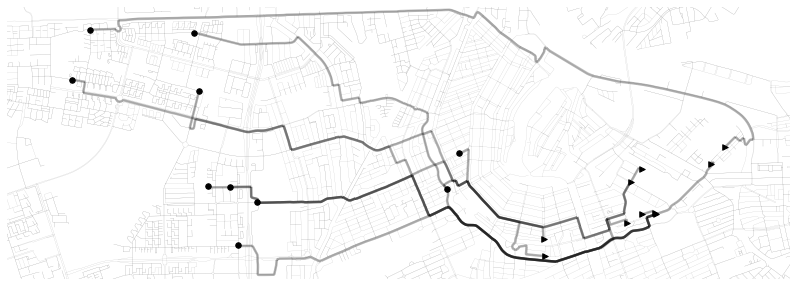

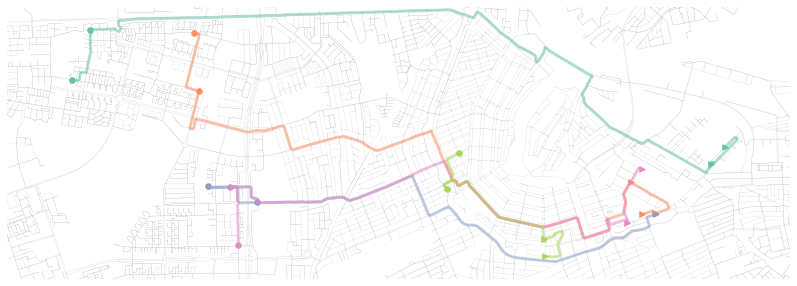

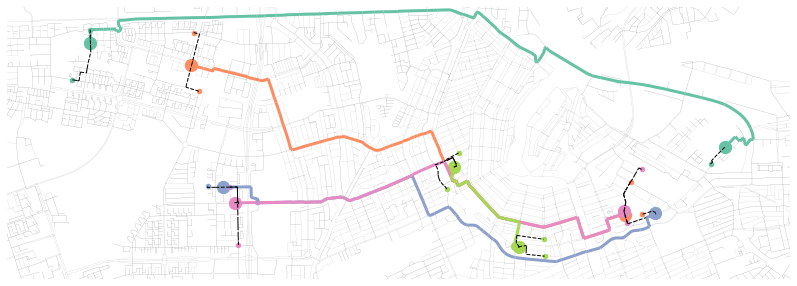

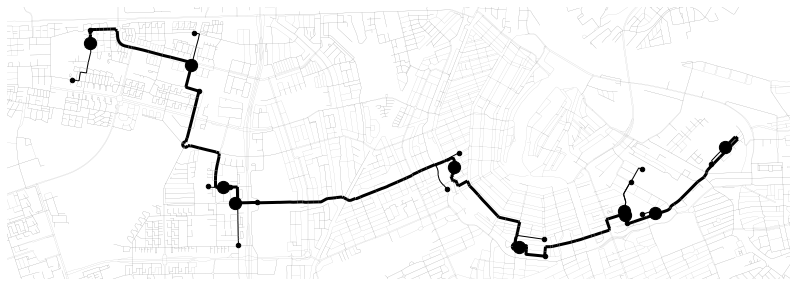

In [98]:
titles = ['a) private',
          'b) door-to-door pooled',
          'c) stop-to-stop pooled',
          'd) hyper-pooled']
for level in [0,1,2,3]:    
    visualizations.plot_ms(inData, ride_index, level = level, 
                           light = True,  fontsize = 8, title = None, figsize =(15,5), figname = 'illustrative')

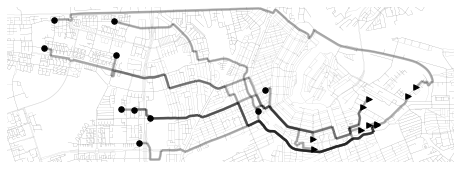

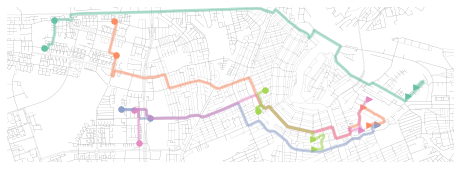

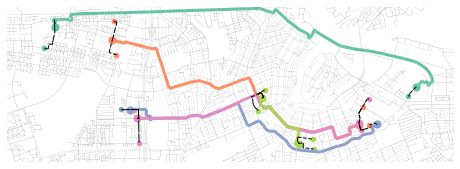

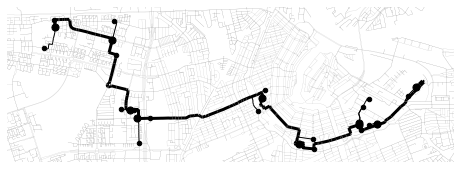

In [93]:
titles = ['a) private',
          'b) door-to-door pooled',
          'c) stop-to-stop pooled',
          'd) hyper-pooled']
for level in [0,1,2,3]:    
    visualizations.plot_ms(inData, ride_index, level = level, 
                           light = True,  fontsize = 8, title = None, figsize =(8,8), figname = 'glance',stop_size = 50)

(<Figure size 1800x1800 with 1 Axes>, <AxesSubplot:>)

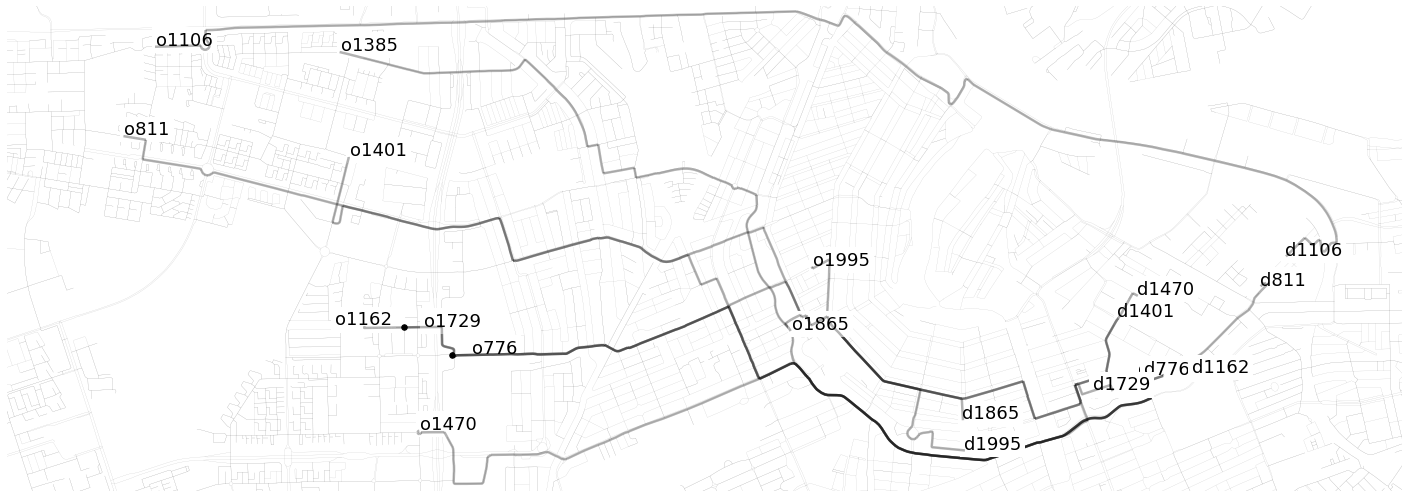

In [175]:
visualizations.plot_ms(inData, ride_index, level = 0, 
                           light = False,  fontsize = 18, title = None, figsize =(25,25))

In [94]:
ride = rides.loc[ride_index]
ride

level_0                                                             562106
index                                                                  NaN
indexes                  [811, 1106, 1385, 1401, 776, 1162, 1470, 1729,...
indexes_orig                      [159824, 160133, 159820, 160141, 160204]
indexes_dest                      [160204, 160133, 160141, 159820, 159824]
u_pax                                                            60.280131
u_veh                                                             1612.875
kind                                                                    ms
ttrav                                                                  NaN
times                    [1518.0, 203, 268, 50, 376, 220.875, 219, 5, 6...
u_paxes                  [17.772417513480455, 14.850677699609845, 13.61...
solution_0                                                               0
solution_1                                                               0
orig_walk_time           

In [95]:
inData.transitize.requests.loc[ride.indexes]

index    origin  destination  treq                 tarr  ttrav  \
811    47518  46416117     46370952   714  2022-03-24 17:37:00   1239   
1106   41903  46441798     46380118  1024  2022-03-24 17:33:00   1207   
1385   43764  46440549     46347931  1307  2022-03-24 18:00:00   1009   
1401  163753  46410025   7223158307  1317  2022-03-24 18:01:00    976   
776   128969  46353508     46348248   676  2022-03-24 17:25:00    734   
1162  123992  46360086   3301285159  1072  2022-03-24 17:53:00    836   
1470   52394  46333591    402600893  1391  2022-03-24 17:37:00    843   
1729  124815  46360150   5791169426  1612  2022-03-24 17:40:00    769   
1995  152053  46376972     46327539  1853  2022-03-24 17:36:00    283   
1865  151189  46358880     46335798  1732  2022-03-24 17:34:00    218   

      origin_x   origin_y  destination_x  destination_y  ...  ride_id  \
811   4.810466  52.377773       4.926342      52.368424  ...   141216   
1106  4.813681  52.383331       4.928920      52.370290  ...   150455   
1385  4.832492  52.383004       4.913949      52.362854  ...   135719   
1401  4.833405  52.376478       4.911853      52.366446  ...   135719   
776   4.843974  52.364172       4.916406      52.362860  ...    52425   
1162  4.835002  52.365942       4.916345      52.362965  ...   141216   
1470  4.840611  52.359442       4.913825      52.367837  ...    63049   
1729  4.839069  52.365873       4.911247      52.361905  ...   158861   
1995  4.880593  52.369657       4.896208      52.358218  ...    66052   
1865  4.878450  52.365648       4.896010      52.360097  ...    66052   

      ttrav_sh       u_sh  kind  position  solution_4  ride_solution_0  \
811       1375  17.866056    52         2         NaN              811   
1106      1359  18.442938    50         4         NaN             1106   
1385      1381  15.478118    40         0         NaN             1385   
1401      1146  15.755282    40         1         NaN             1401   
776       1104   9.776846    31         0         NaN              776   
1162       884  13.980041    52         4         NaN             1162   
1470       964  12.995045    30         1         NaN             1470   
1729       875  12.420704   100         5         NaN             1729   
1995       360   3.334128    30         2         NaN             1995   
1865       339   2.924183    30         1         NaN             1865   

     ride_solution_1  ride_solution_2 ride_solution_3  
811           141216            94125          721808  
1106          150455           142378          721808  
1385          135719            61352          721808  
1401          135719            61352          721808  
776            52425           103392          721808  
1162          141216           159861          721808  
1470           63049           159861          721808  
1729          158861           158861          721808  
1995           66052           160204          721808  
1865           66052           160204          721808  

[10 rows x 35 columns]

In [97]:
ride_id = ride.index
ride = inData.transitize.rides.loc[ride_id]
s2s_rides = json.loads(ride.high_level_indexes)
s2s = inData.transitize.rides.loc[s2s_rides]
s2s

KeyError: "None of [Index(['level_0', 'index', 'indexes', 'indexes_orig', 'indexes_dest', 'u_pax',\n       'u_veh', 'kind', 'ttrav', 'times', 'u_paxes', 'solution_0',\n       'solution_1', 'orig_walk_time', 'dest_walk_time',\n       'low_level_indexes_set', 'origin', 'destination', 'd2d_reference',\n       'solution_2', 'high_level_indexes', 'solution_3', 'fare'],\n      dtype='object')] are in the [index]"

In [120]:
inData.transitize.final.loc[s2s.d2d_reference]

level_0   index     indexes      u_pax  u_veh kind   ttrav  \
3632.0     3632  3632.0  [314, 386]  12.848892  451.0  d2d   858.0   
4160.0     4160  4160.0  [431, 383]  12.394229  487.0  d2d   965.0   
1994.0     1994  1994.0  [387, 388]  17.642261  869.0  d2d  1560.0   

        orig_walk_time  dest_walk_time  solution_0  solution_1  \
3632.0             0.0             0.0           0           1   
4160.0             0.0             0.0           0           0   
1994.0             0.0             0.0           0           0   

       low_level_indexes_set  origin  destination  d2d_reference  solution_2  \
3632.0                   NaN     NaN          NaN            NaN           1   
4160.0                   NaN     NaN          NaN            NaN           0   
1994.0                   NaN     NaN          NaN            NaN           0   

       high_level_indexes  solution_3  
3632.0                NaN           0  
4160.0                NaN           0  
1994.0                NaN           0

In [116]:
inData.transitize.final.loc[4160]

level_0                        4160
index                        4160.0
indexes                  [431, 383]
u_pax                     12.394229
u_veh                         487.0
kind                            d2d
ttrav                         965.0
orig_walk_time                  0.0
dest_walk_time                  0.0
solution_0                        0
solution_1                        0
low_level_indexes_set           NaN
origin                          NaN
destination                     NaN
d2d_reference                   NaN
solution_2                        0
high_level_indexes              NaN
solution_3                        0
Name: 4160, dtype: object

level_0                        7854
index                        3788.0
indexes                  [179, 207]
indexes_orig                    NaN
indexes_dest                    NaN
u_pax                     15.996678
u_veh                         690.0
kind                            s2s
ttrav                         690.0
orig_walk_time                357.0
dest_walk_time                753.0
solution_0                        0
solution_1                        0
low_level_indexes_set    {179, 207}
origin                   46419380.0
destination              46348610.0
d2d_reference                3788.0
solution_2                        0
high_level_indexes              NaN
solution_3                        0
Name: 7854, dtype: object
level_0                          7856
index                          4858.0
indexes                    [228, 229]
indexes_orig                      NaN
indexes_dest                      NaN
u_pax                       12.458814
u_veh                     

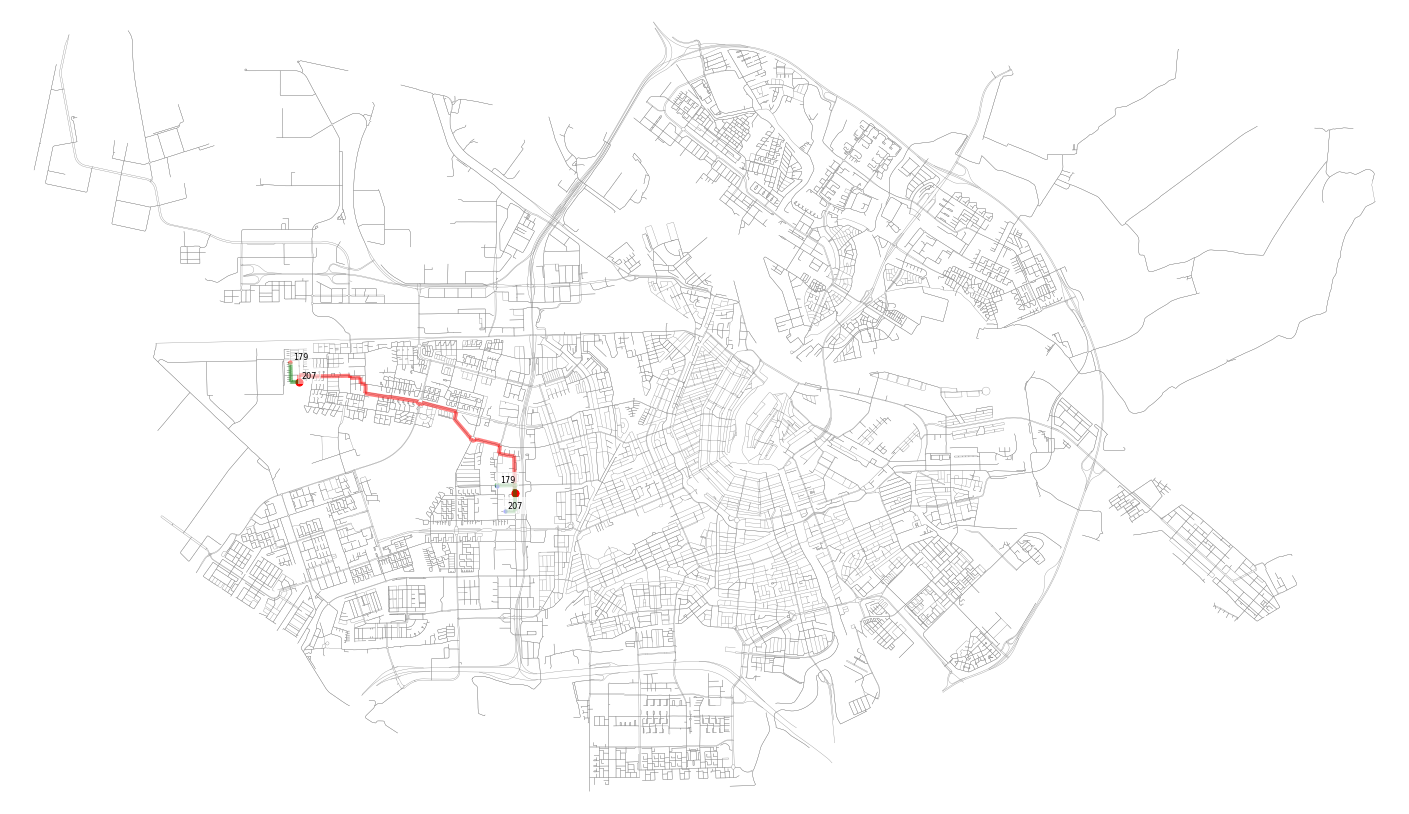

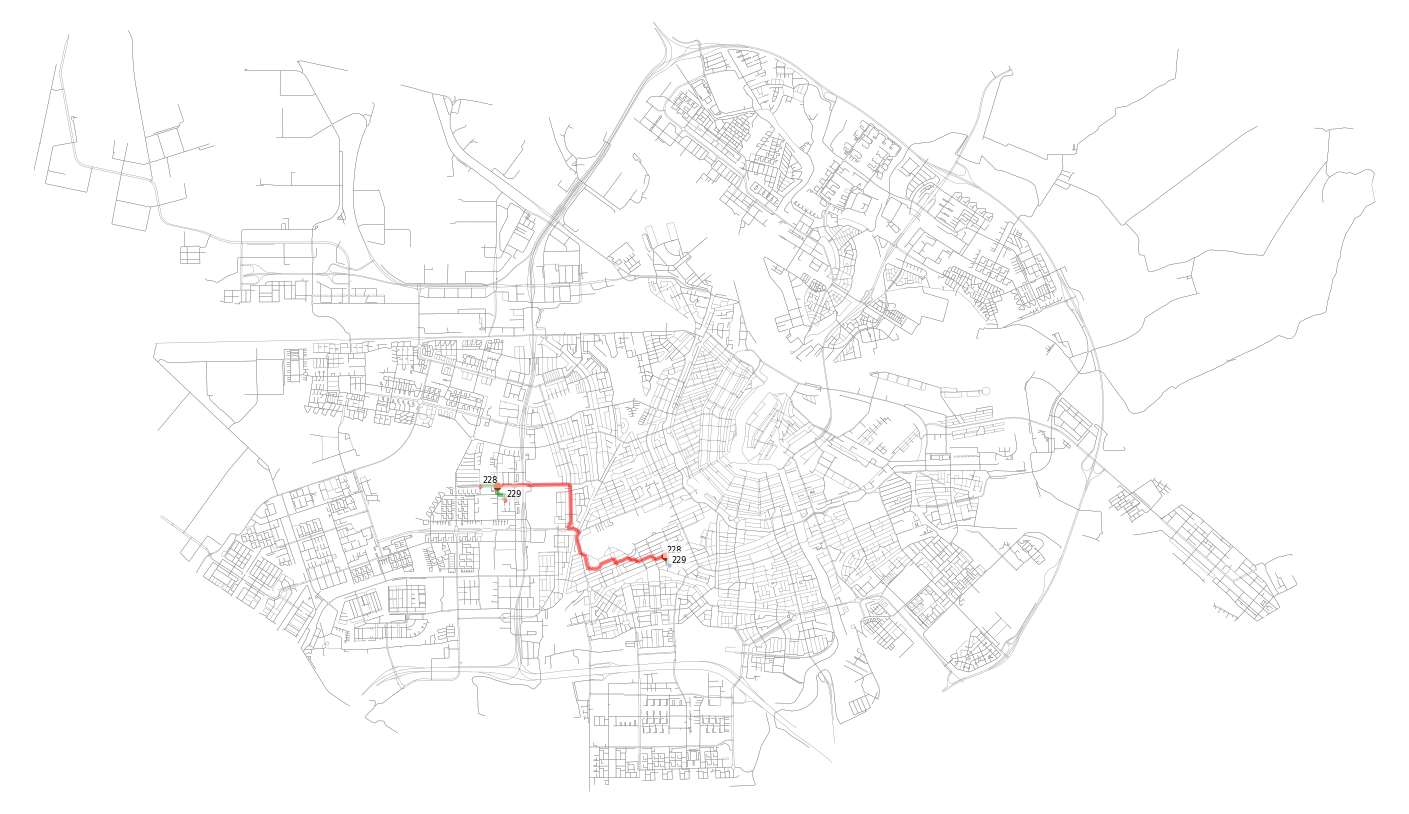

In [15]:
ride_id = 8045
ride = inData.transitize.rides.loc[ride_id]

s2s_rides = json.loads(ride.high_level_indexes)

for r in s2s_rides:
    print(inData.transitize.rides.loc[r])
    visualizations.plot_s2s(inData, r, fig = None)

In [60]:
inData.transitize.rides3[inData.transitize.rides3.kind == 's2s']

index   indexes     u_pax  u_veh kind  ttrav  orig_walk_time  \
178  126.0  [54, 75]  4.042643  166.0  s2s  166.0           278.0   
179  147.0  [83, 92]  3.496714  196.0  s2s  196.0           445.0   
180  177.0  [83, 92]  3.496714  196.0  s2s  196.0           445.0   

     dest_walk_time  solution_0  solution_1 low_level_indexes  \
178           453.0           0           0          [54, 75]   
179            75.0           0           0          [83, 92]   
180            75.0           0           0          [83, 92]   

    low_level_indexes_set  solution_2 u_paxes times indexes_orig indexes_dest  \
178              {75, 54}           1     NaN   NaN          NaN          NaN   
179              {83, 92}           0     NaN   NaN          NaN          NaN   
180              {83, 92}           0     NaN   NaN          NaN          NaN   

     degree unmergables  
178     NaN         NaN  
179     NaN         NaN  
180     NaN         NaN

In [105]:
inData.transitize.rides3[inData.transitize.rides3.kind == 'ms']

level_0  index           indexes    u_pax  u_veh kind  ttrav  \
191        0    NaN          [38, 44]  3.56500  230.0   ms  230.0   
192        1    NaN          [91, 79]  7.50700  482.0   ms  482.0   
193        2    NaN          [79, 91]  7.50700  482.0   ms  482.0   
194        3    NaN          [91, 79]  7.50700  482.0   ms  482.0   
195        4    NaN          [79, 91]  7.50700  482.0   ms  482.0   
196        5    NaN          [60, 93]  6.68150  418.0   ms  418.0   
197        6    NaN  [91, 79, 60, 93]  8.31615  593.0   ms  900.0   
198        7    NaN  [79, 91, 60, 93]  8.31615  593.0   ms  900.0   
199        8    NaN  [91, 79, 60, 93]  8.31615  593.0   ms  900.0   
200        9    NaN  [79, 91, 60, 93]  8.31615  593.0   ms  900.0   
201       10    NaN  [60, 93, 91, 79]  9.99440  791.0   ms  900.0   
202       11    NaN  [60, 93, 79, 91]  9.99440  791.0   ms  900.0   
203       12    NaN  [60, 93, 91, 79]  9.99440  791.0   ms  900.0   
204       13    NaN  [60, 93, 79, 91]  9.99440  791.0   ms  900.0   
205       14    NaN  [60, 93, 91, 79]  9.77040  757.0   ms  900.0   
206       15    NaN  [60, 93, 79, 91]  9.77040  757.0   ms  900.0   
207       16    NaN  [60, 93, 91, 79]  9.77040  757.0   ms  900.0   
208       17    NaN  [60, 93, 79, 91]  9.77040  757.0   ms  900.0   
209       18    NaN  [91, 79, 60, 93]  8.98115  690.0   ms  900.0   
210       19    NaN  [79, 91, 60, 93]  8.98115  690.0   ms  900.0   
211       20    NaN  [91, 79, 60, 93]  8.98115  690.0   ms  900.0   
212       21    NaN  [79, 91, 60, 93]  8.98115  690.0   ms  900.0   

     orig_walk_time  dest_walk_time  solution_0  solution_1 low_level_indexes  \
191           151.0           333.0           0           0               NaN   
192           219.0           228.0           0           0               NaN   
193           219.0           228.0           0           0               NaN   
194           219.0           228.0           0           0               NaN   
195           219.0           228.0           0           0               NaN   
196           442.0           476.0           0           0               NaN   
197           661.0           704.0           0           0               NaN   
198           661.0           704.0           0           0               NaN   
199           661.0           704.0           0           0               NaN   
200           661.0           704.0           0           0               NaN   
201           661.0           704.0           0           0               NaN   
202           661.0           704.0           0           0               NaN   
203           661.0           704.0           0           0               NaN   
204           661.0           704.0           0           0               NaN   
205           661.0           704.0           0           0               NaN   
206           661.0           704.0           0           0               NaN   
207           661.0           704.0           0           0               NaN   
208           661.0           704.0           0           0               NaN   
209           661.0           704.0           0           0               NaN   
210           661.0           704.0           0           0               NaN   
211           661.0           704.0           0           0               NaN   
212           661.0           704.0           0           0               NaN   

    low_level_indexes_set  origin  destination  solution_2  
191                   NaN     NaN          NaN           0  
192                   NaN     NaN          NaN           0  
193                   NaN     NaN          NaN           0  
194                   NaN     NaN          NaN           0  
195                   NaN     NaN          NaN           0  
196                   NaN     NaN          NaN           0  
197                   NaN     NaN          NaN           0  
198                   NaN     NaN          NaN           0  
199 

In [36]:
pd.concat([a,b])

u_veh             228411.000000
u_pax               4459.928866
ttrav             388552.000000
orig_walk_time      1404.000000
dest_walk_time      1336.000000
1                    132.000000
20                    59.000000
21                    52.000000
30                    19.000000
31                     7.000000
32                     5.000000
40                     3.000000
42                     5.000000
50                     2.000000
52                     1.000000
ms                     1.000000
s2s                    1.000000
dtype: float64

0              1              2              3
1                  500.000000     133.000000     133.000000     132.000000
20                        NaN      66.000000      61.000000      59.000000
21                        NaN      46.000000      49.000000      52.000000
30                        NaN      19.000000      19.000000      19.000000
31                        NaN       7.000000       7.000000       7.000000
32                        NaN       6.000000       6.000000       5.000000
40                        NaN       3.000000       3.000000       3.000000
42                        NaN       5.000000       5.000000       5.000000
50                        NaN       2.000000       2.000000       2.000000
52                        NaN       1.000000       1.000000       1.000000
check              500.000000     500.000000     500.000000     500.000000
dest_walk_time       0.000000       0.000000    1229.000000    1336.000000
ms                        NaN            NaN            NaN       1.000000
orig_walk_time       0.000000       0.000000     787.000000    1404.000000
s2s                       NaN            NaN       2.000000       1.000000
ttrav           309082.000000  389167.000000  388613.000000  388552.000000
u_pax             4796.157358    4476.553289    4475.015738    4459.928866
u_veh           309082.000000  228682.000000  228472.000000  228411.000000

In [16]:
inData.transitize.final[inData.transitize.final.kind == 'ms']

level_0  index                                        indexes  \
6452        0    NaN                                       [96, 81]   
6453        1    NaN                                       [81, 96]   
6454        2    NaN                                       [81, 96]   
6455        3    NaN                                       [96, 81]   
6456        4    NaN                                     [180, 124]   
6457        5    NaN                                     [388, 391]   
6458        6    NaN                                     [391, 388]   
6459        7    NaN                                     [391, 388]   
6460        8    NaN                                     [388, 391]   
6461        9    NaN                           [440, 440, 283, 283]   
6462       10    NaN                           [440, 440, 283, 283]   
6463       11    NaN                                     [448, 461]   
6464       12    NaN                                     [461, 448]   
6465       13    NaN                           [440, 440, 452, 452]   
6466       14    NaN                           [283, 283, 452, 452]   
6467       15    NaN                                     [461, 448]   
6468       16    NaN                           [440, 440, 452, 452]   
6469       17    NaN                           [283, 283, 452, 452]   
6470       18    NaN  [440, 440, 440, 283, 283, 283, 452, 452, 452]   
6471       19    NaN  [440, 440, 440, 283, 283, 283, 452, 452, 452]   
6472       20    NaN                           [448, 461, 388, 391]   
6473       21    NaN                           [448, 461, 391, 388]   
6474       22    NaN                           [448, 461, 391, 388]   
6475       23    NaN                           [448, 461, 388, 391]   
6476       24    NaN                           [461, 448, 388, 391]   
6477       25    NaN                           [461, 448, 391, 388]   
6478       26    NaN                           [461, 448, 391, 388]   
6479       27    NaN                           [461, 448, 388, 391]   
6480       28    NaN                           [461, 448, 388, 391]   
6481       29    NaN                           [461, 448, 391, 388]   
6482       30    NaN                           [461, 448, 391, 388]   
6483       31    NaN                           [461, 448, 388, 391]   
6484       32    NaN                           [388, 391, 448, 461]   
6485       33    NaN                           [388, 391, 461, 448]   
6486       34    NaN                           [391, 388, 448, 461]   
6487       35    NaN                           [391, 388, 461, 448]   
6488       36    NaN                           [391, 388, 448, 461]   
6489       37    NaN                           [391, 388, 461, 448]   
6490       38    NaN                           [388, 391, 448, 461]   
6491       39    NaN                           [388, 391, 461, 448]   
6492       40    NaN                           [388, 391, 461, 448]   
6493       41    NaN                           [391, 388, 461, 448]   
6494       42    NaN                           [391, 388, 461, 448]   
6495       43    NaN                           [388, 391, 461, 448]   

          u_pax   u_veh kind   ttrav  orig_walk_time  dest_walk_time  \
6452   4.320500   286.0   ms   286.0           121.0           643.0   
6453   4.320500   286.0   ms   286.0           121.0           643.0   
6454   4.320500   286.0   ms   286.0           121.0           643.0   
6455   4.320500   286.0   ms   286.0           121.0           643.0   
6456   7.792000   548.0   ms   548.0           744.0           665.0   
6457  13.266500   907.0   ms   907.0           285.0           747.0   
6458  13.266500   907.0   ms   907.0           285.0           747.0   
6459  13.266500   907.0   ms   907.0           285.0           747.0   
6460  13.266500   907.0   ms   907.0           285.0           747.0   
6461  14.384000    52.0   ms    52.0           246.0             0.0   
6462  14.384000   

In [18]:
inData.transitize.final[inData.transitize.final.solution_3 ==1]

level_0   index                    indexes      u_pax   u_veh kind  \
3           3     3.0                        [3]   5.411943   351.0    1   
5           5     5.0                        [5]   7.917376   532.0    1   
7           7     7.0                        [7]   5.268284   348.0    1   
8           8     8.0                        [8]   6.358579   409.0    1   
13         13    13.0                       [13]  10.298222   659.0    1   
...       ...     ...                        ...        ...     ...  ...   
6424     6424  6424.0  [312, 320, 349, 431, 465]  58.351125  1879.0   52   
6450     6450  5104.0            [440, 283, 452]  65.590003    52.0  s2s   
6455        3     NaN                   [96, 81]   4.320500   286.0   ms   
6456        4     NaN                 [180, 124]   7.792000   548.0   ms   
6467       15     NaN                 [461, 448]   5.286000   231.0   ms   

       ttrav  orig_walk_time  dest_walk_time  solution_0  solution_1  \
3      351.0             0.0             0.0           1           1   
5      532.0             0.0             0.0           1           1   
7      348.0             0.0             0.0           1           1   
8      409.0             0.0             0.0           1           1   
13     659.0             0.0             0.0           1           1   
...      ...             ...             ...         ...         ...   
6424  6911.0             0.0             0.0           0           1   
6450    52.0           423.0             0.0           0           0   
6455   286.0           121.0           643.0           0           0   
6456   548.0           744.0           665.0           0           0   
6467   231.0           206.0            59.0           0           0   

                                  low_level_indexes low_level_indexes_set  \
3                                               NaN                   NaN   
5                                               NaN                   NaN   
7                                               NaN                   NaN   
8                                               NaN                   NaN   
13                                              NaN                   NaN   
...                                             ...                   ...   
6424                                            NaN                   NaN   
6450  [440, 440, 440, 283, 283, 283, 452, 452, 452]       {440, 283, 452}   
6455                                            NaN                   NaN   
6456                                            NaN                   NaN   
6467                                            NaN                   NaN   

            origin  destination  solution_2  solution_3  
3              NaN          NaN           1           1  
5              NaN          NaN           1           1  
7              NaN          NaN           1           1  
8              NaN          NaN           1           1  
13             NaN          NaN           1           1  
...            ...          ...         ...         ...  
6424           NaN          NaN           1           1  
6450  2.117424e+09  896433130.0           0           1  
6455           NaN          NaN           0           1  
6456           NaN          NaN           0           1  
6467           NaN          NaN           0           1  

[289 rows x 17 columns]

In [124]:
ride_id = 190
inData.transitize.final.loc[ride_id]

dest_walk_time                                                       228.0
destination                                                   4300758653.0
df                           ride  exp_u_private  exp_u_d2d  ...  exp_u...
dist                                                                3880.0
efficient                                                             True
indexes                                                           [79, 91]
orig_walk_time                                                       219.0
origin                                                         310785561.0
transitizable                                                         True
treq                                                                 929.0
ttrav                                                                482.0
u_pax                                                             6.381183
u_veh                                                                482.0
indexes_set              

In [49]:
from ExMAS.transitize import visualizations

In [50]:
rides = inData.transitize.final
requests = inData.transitize.requests
requests

index      origin  destination  treq                 tarr  ttrav  \
0    4189960    46329694    571799319     0  2021-06-16 15:14:00   1429   
1    4313177  6367848426     46337695     0  2021-06-16 15:29:00    576   
2    4394183  6933008674     46345064     0  2021-06-16 15:17:00    459   
3    4515830  1595259648     46326847     0  2021-06-16 15:06:00    257   
4    4122042  4331543077     46201000    60  2021-06-16 15:14:00   1643   
..       ...         ...          ...   ...                  ...    ...   
495  4128363    46502041     46312620  3540  2021-06-16 16:36:00   1053   
496  4140419    46478642     46415901  3540  2021-06-16 16:27:00   1222   
497  4163928    46564637   1881747622  3540  2021-06-16 16:03:00    374   
498  4230208    46347671     46305202  3540  2021-06-16 16:06:00    595   
499  4350041  4924587473   4489495341  3540  2021-06-16 16:11:00    470   

      dist                  ttrav_alb   pax_id       VoT       delta  \
0    11439  0 days 00:14:00.000000000  4189960  0.003482  921.216995   
1     4615  0 days 00:29:00.000000000  4313177  0.003532  364.588209   
2     3677  0 days 00:17:00.000000000  4394183  0.003780  264.492191   
3     2056  0 days 00:06:00.000000000  4515830  0.003824  145.391167   
4    13147  0 days 00:13:00.000000000  4122042  0.004257  796.916898   
..     ...                        ...      ...       ...         ...   
495   8424  0 days 00:37:00.000000000  4128363  0.003061  804.899145   
496   9777  0 days 00:28:00.000000000  4140419  0.003545  768.129553   
497   2999  0 days 00:04:00.000000000  4163928  0.003290  260.740784   
498   4762  0 days 00:07:00.000000000  4230208  0.002975  472.139059   
499   3762  0 days 00:12:00.000000000  4350041  0.003211  337.685970   

             u    u_PT  ride_id  ttrav_sh       u_sh  kind  position  
0    22.133918  999999     3976      1661  19.774748    21         0  
1     8.956978  999999     5125       658   8.317867    31         1  
2     7.250419  999999        2       459   7.250419     1         0  
3     4.066885  999999        3       257   4.066885     1         0  
4    26.713969  999999     2763      1907  25.820218    21         0  
..         ...     ...      ...       ...        ...   ...       ...  
495  15.859214  999999     4640      1103  15.636775    30         0  
496  18.997573  999999     1532      1244  15.876962    20         1  
497   5.729108  999999     2269       420   4.867014    20         1  
498   8.913241  999999      912       707   8.434649    20         1  
499   7.152037  999999     4047       470   5.965447    21         1  

[500 rows x 18 columns]

In [65]:
ride = rides[rides.kind == 's2s'].sample(1).squeeze()
ride['origins'] = requests.loc[ride.indexes].origin.values
ride['destinations'] = requests.loc[ride.indexes].destination.values
ride

level_0                                     5946
index                                     1161.0
indexes                               [425, 381]
u_pax                                  11.174914
u_veh                                      438.0
kind                                         s2s
ttrav                                      438.0
orig_walk_time                             298.0
dest_walk_time                             763.0
solution_0                                     0
solution_1                                     0
low_level_indexes                     [425, 381]
low_level_indexes_set                 {425, 381}
origin                              2352244639.0
destination                           46332487.0
solution_2                                     0
solution_3                                     0
origins                  [2311109634, 287776239]
destinations              [2613369564, 46342969]
Name: 5946, dtype: object

In [131]:
def plot2(inData, ride_id):
    ride = rides[rides.kind == 's2s'].sample(1).squeeze()
    ride = inData.transitize.rides2.loc[ride2.name]
    ride2.origins = json.loads(ride.origins)
    ride2.destinations = json.loads(ride.destinations)
    fig, ax = plot_ride(inData,ride2)
    return ride2
plot2(inData,170)

KeyError: 170

destination                                                420259792.0
df                       ride  exp_u_private  exp_u_d2d  ...  exp_u...
dist                                                            3984.0
efficient                                                         True
indexes                                                       [38, 75]
origin                                                      46409178.0
transitizable                                                     True
treq                                                             879.0
ttrav                                                            567.0
indexes_set                                                   {75, 38}
unmergables                                          [753, 1812, 3522]
pax_id                                                            2610
low_level_indexes                                             [38, 75]
Name: 2610, dtype: object

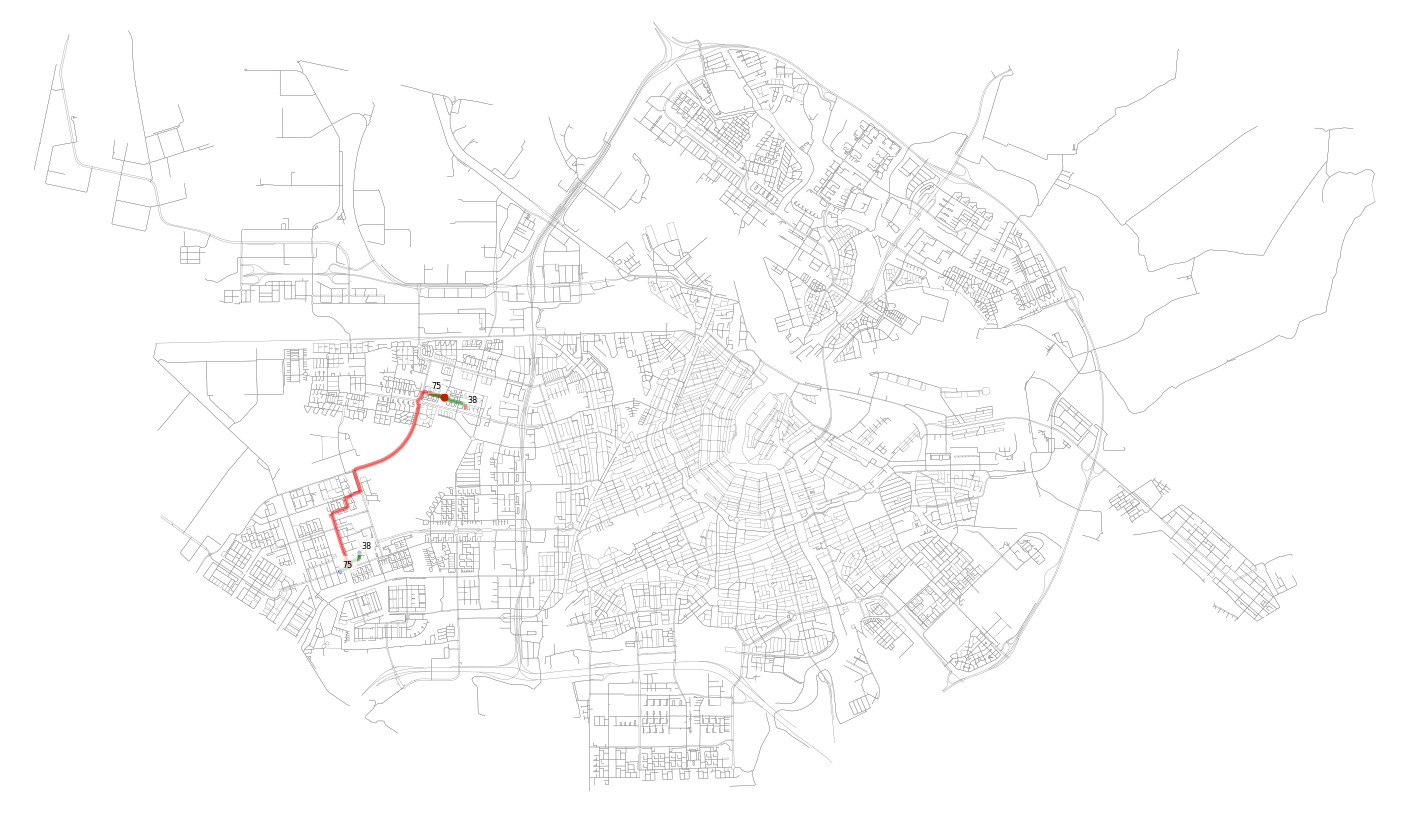

In [93]:
plot2(inData,4437)

In [110]:
inData.request2

destination                                                 df  \
753   4.202598e+08      ride  exp_u_private  exp_u_d2d  ...  exp_u...   
895   4.631998e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1482  4.648981e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1742  4.656646e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1743  4.656646e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1812  4.202598e+08      ride  exp_u_private  exp_u_d2d  ...  exp_u...   
1838  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1839  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1995  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
1996  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2133  4.648981e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2253  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2254  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2258  6.219354e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2259  6.219354e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
2610  4.202598e+08      ride  exp_u_private  exp_u_d2d  ...  exp_u...   
2678  4.631998e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3114  4.648981e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3467  4.656646e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3468  4.656646e+07       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3522  4.202598e+08      ride  exp_u_private  exp_u_d2d  ...  exp_u...   
3555  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3556  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3638  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3639  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3829  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3830  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3832  6.219354e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
3833  6.219354e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4284  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4287  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4305  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4308  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4420  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4425  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4437  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4442  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4843  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4846  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4861  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4864  8.964331e+08       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4945  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4950  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4956  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   
4961  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   

         dist  efficient          indexes        origin  transitizable  \
753    3984.0       True         [75, 38]  4.640918e+07           True   
895    3766.0       True       [405, 464]  4.639077e+07           True   
1482   5367.0       True       [378, 377]  4.636986e+07           True   
1742  13549.0       True       [370, 220]  4.644712e+07           True   
1743  13549.0       True       [220, 370]  4.644712e+07           True   
1812   3984.0       True         [38, 75]  4.640918e+07           True   
1838  10276.0       True       [288, 449]  6.219354e+09           True   
1839  10276.0       True       [449, 288]  6.219354e+09 

In [28]:
inData.keys()

odict_keys(['rides1', 'transitized_rm', 'solution', 'second_level_rides', 'requests1', 'both_level_rides', 'request2'])

In [29]:
inData.requests1.sample(2)

index     origin  destination  treq                 tarr  ttrav  dist  \
465  4326565   46354005     46431838  3360  2021-06-14 16:01:00    422  3383   
448  4581985  460441703     46248282  3300  2021-06-14 16:10:00    553  4424   

                     ttrav_alb   pax_id       VoT       delta         u  \
465  0 days 00:05:00.000000000  4326565  0.003491  271.555246  6.547900   
448  0 days 00:15:00.000000000  4581985  0.004040  289.308665  8.870319   

       u_PT  ride_id  ttrav_sh      u_sh  kind  position  
465  999999     4631       518  5.819154    30         0  
448  999999      448       553  8.870319     1         0

In [30]:
inData.rides1.sample(2)

indexes      u_pax  u_veh  kind  \
1338       [245, 327]  14.216713   1292    20   
4285  [449, 288, 450]  59.806030   1344    30   

                                                u_paxes  \
1338             [9.007559759480499, 5.209153237565367]   
4285  [19.889848238363314, 19.519228681602904, 20.39...   

                            times     indexes_orig     indexes_dest  degree  \
1338      [2024.5, 691, 180, 421]       [245, 327]       [245, 327]       2   
4285  [2910.0, 0, 0, 1284, 0, 60]  [449, 288, 450]  [449, 288, 450]       3   

      index  PassHourTrav_ns  selected                               origins  \
1338   1338              950         0                  [46391072, 46378182]   
4285   4285             3913         0  [6219354473, 6219354473, 6219354473]   

                            destinations                      deps  \
1338                [46420326, 46427364]          [2024.5, 2715.5]   
4285  [896433130, 896433130, 6219354466]  [2910.0, 2910.0, 2910.0]   

                  dep_deltas             treqs               delays  \
1338         [-330.0, 330.0]       [2040 2700]        [-15.5  15.5]   
4285  [300.0, -600.0, 300.0]  [3360 2460 3360]  [-450.  450. -450.]   

                  ttravs  
1338          [871, 601]  
4285  [1284, 1344, 1344]

In [40]:
inData.requests1.loc[451]

index                            4110435
origin                        6219354473
destination                   6219354466
treq                                3360
tarr                 2021-06-14 16:01:00
ttrav                               1345
dist                               10762
ttrav_alb      0 days 00:05:00.000000000
pax_id                           4110435
VoT                             0.003378
delta                          902.76528
u                              20.686208
u_PT                              999999
ride_id                             5719
ttrav_sh                            1344
u_sh                           19.576264
kind                                 100
position                               1
Name: 451, dtype: object

In [43]:
r = inData.request2.sample(1)
r

destination                                                 df    dist  \
753  420259792.0      ride  exp_u_private  exp_u_d2d  ...  exp_u...  3984.0   

     efficient   indexes      origin  transitizable   treq  ttrav indexes_set  \
753       True  [75, 38]  46409178.0           True  879.0  567.0    {75, 38}   

            unmergables  pax_id low_level_indexes  
753  [1812, 2610, 3522]     753          [75, 38]

In [44]:
inData.rides1.loc[r.index[0]]

indexes                                          [75, 38]
u_pax                                            14.72414
u_veh                                                 632
kind                                                   20
u_paxes            [6.658251386948441, 8.065888866404501]
times                                [380.5, 79, 488, 65]
indexes_orig                                     [75, 38]
indexes_dest                                     [75, 38]
degree                                                  2
index                                                 753
PassHourTrav_ns                                       986
selected                                                0
origins                              [46412943, 46403224]
destinations                        [420259806, 46301213]
deps                                       [380.5, 459.5]
dep_deltas                                  [60.0, -60.0]
treqs                                           [480 360]
delays        

In [25]:
inData.rides1.loc[inData.request2.loc[4420].unmergables]

KeyError: '[1995, 1996, 2253, 2254, 2258, 2259, 3638, 3639, 3829, 3830, 3832, 3833, 4284, 4287, 4305, 4308, 4425, 4437, 4442, 4843, 4846, 4861, 4864, 4945, 4950, 4956, 4961]'

In [22]:
inData.request2.sample(1)

destination                                                 df  \
4420  2.117424e+09       ride  exp_u_private  exp_u_d2d  ...  exp_...   

         dist  efficient          indexes        origin  transitizable  \
4420  10645.0       True  [430, 450, 451]  6.219354e+09           True   

        treq  ttrav      indexes_set  \
4420  3759.0   21.0  {450, 451, 430}   

                                            unmergables  pax_id  \
4420  [1995, 1996, 2253, 2254, 2258, 2259, 3638, 363...    4420   

     low_level_indexes  
4420   [430, 450, 451]

In [67]:
inData.first_level_rides.loc[3790]

indexes                                        [440, 473]
u_pax                                           14.574247
u_veh                                                 612
kind                                                   21
u_paxes            [7.534962553583089, 7.039284915086785]
times                                [3367.5, 45, 567, 0]
indexes_orig                                   [440, 473]
indexes_dest                                   [473, 440]
degree                                                  2
index                                                3790
PassHourTrav_ns                                      1180
selected                                                0
origins                              [46562099, 46566460]
destinations                     [2768560412, 2768560412]
deps                                     [3367.5, 3412.5]
dep_deltas                                  [-30.0, 30.0]
treqs                                         [3360 3420]
delays        

In [63]:
eff_rides = inData.transitized_rm[inData.transitized_rm.efficient==True].ride.values
inData.transitized_rm[inData.transitized_rm.ride.isin(eff_rides)]

ride  exp_u_private  exp_u_d2d   sum_exp          u       u_sh    origin  \
147   638       0.026004   0.033861  0.102252   7.299031   6.770999  46357671   
173   638       0.033779   0.048565  0.125512   6.775821   6.049718  46349072   
297  1071       0.002382   0.003016  0.017197  12.079238  11.607959  46412617   
428  1071       0.001683   0.002377  0.016157  12.774398  12.084075  46410409   
440  2200       0.009422   0.023110  0.062690   9.329461   7.534963  46562099   
440  2200       0.009422   0.023110  0.062690   9.329461   7.534963  46562099   
473  2200       0.013035   0.029610  0.061700   8.680228   7.039285  46566460   
473  2200       0.013035   0.029610  0.061700   8.680228   7.039285  46566460   
58   2304       0.100458   0.109584  0.264521   4.596031   4.422132  46316859   
85   2304       0.057637   0.064823  0.195727   5.707167   5.472181  46321773   
147  2527       0.026004   0.030871  0.099262   7.299031   6.955858  46357671   
173  2527       0.033779   0.048565  0.125512   6.775821   6.049718  46349072   
428  2917       0.001683   0.001875  0.015656  12.774398  12.557983  46410409   
297  2917       0.002382   0.002874  0.017055  12.079238  11.704301  46412617   
440  3790       0.009422   0.023110  0.062690   9.329461   7.534963  46562099   
440  3790       0.009422   0.023110  0.062690   9.329461   7.534963  46562099   
473  3790       0.013035   0.029610  0.061700   8.680228   7.039285  46566460   
473  3790       0.013035   0.029610  0.061700   8.680228   7.039285  46566460   

     destination  dist       VoT  orig_walk_time  delay  dest_walk_time  \
147     46247628  3834  0.003232           367.0  154.0             0.0   
173     46248282  3556  0.003247           376.0  155.0            15.0   
297     46376939  6458  0.002964           391.0  165.0            51.0   
428     46367468  6852  0.002916            61.0  165.0           326.0   
440   2768560412  4906  0.003214             0.0  180.0             0.0   
440   2768560412  4906  0.003214             0.0  180.0             0.0   
473   2768560412  4543  0.003291           301.0  181.0             0.0   
473   2768560412  4543  0.003291           301.0  181.0             0.0   
58      46289580  2381  0.003450           395.0   78.0           281.0   
85    5481400830  2928  0.003593             0.0   77.0           382.0   
147     46247628  3834  0.003232           367.0  154.0             0.0   
173     46248282  3556  0.003247           376.0  155.0            15.0   
428     46367468  6852  0.002916            61.0  165.0           326.0   
297     46376939  6458  0.002964           391.0  165.0            51.0   
440   2768560412  4906  0.003214             0.0  180.0             0.0   
440   2768560412  4906  0.003214             0.0  180.0             0.0   
473   2768560412  4543  0.003291           301.0  181.0             0.0   
473   2768560412  4543  0.003291           301.0  181.0             0.0   

     s2s_ttrav     u_s2s  exp_u_s2s  prob_s2s  efficient  pax_id  
147        526  6.321823   0.042387  0.414537       True     147  
173        526  6.285316   0.043168  0.343935      False     173  
297        862  8.879470   0.011799  0.686109       True     297  
428        862  8.829550   0.012097  0.748735       True     428  
440        807  7.002620   0.030158  0.481064       True     440  
440        807  7.002620   0.030158  0.481064       True     440  
473        807  7.920859   0.019055  0.308832      False     473  
473        807  7.920859   0.019055  0.308832      False     473  
58         390  5.819871   0.054479  0.205954      False      58  
85         390  5.227313   0.073266  0.374329       True      85  
147        526  6.321823   0.042387  0.427022       True     147  
173        526  6.285316   0.043168  0.343935      False     173  
428        862  8.829550   0.012097  0.772716       True     428  
297        862  8.879470   0.011799  0.691814       True     297  
440        807  7.002620   0.03015

In [41]:
inData.first_level_rides.ttravs = inData.first_level_rides.ttravs.apply(lambda x: json.loads(x))

In [47]:
inData.first_level_rides[inData.first_level_rides.selected == True].u_pax.sum()

4498.466245418924

In [45]:
ttravs = inData.first_level_rides[inData.first_level_rides.selected == True].ttravs
pd.Series(sum(ttravs, [])).sum()

389272

In [14]:
inData.keys()

odict_keys(['first_level_rides', 'transitized_rm', 'solution', 'second_level_rides', 'both_level_rides', 'second_level_requests', 'requests'])

In [27]:
inData.requests.ttrav.sum()

309820

In [48]:
inData.requests.u.sum()

4807.567944666493

In [25]:
inData.first_level_rides[inData.first_level_rides.selected == True].u_veh.sum()

236402

In [23]:
indeksy = inData.first_level_rides[inData.first_level_rides.selected == True].indexes
pd.Series(sum(indeksy, [])).sort_values()

0        0
322      1
1        2
235      3
303      4
      ... 
269    495
426    496
141    497
142    498
143    499
Length: 500, dtype: int64

In [41]:
pd.Series(sum(inData.first_level_rides.indexes.values, [])).sort_values()

0         0
1         1
2         2
3         3
4         4
       ... 
413     398
398     398
411     398
399     399
1643    399
Length: 1792, dtype: int64

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [32]:
transitized_rm

ride  exp_u_private  exp_u_d2d   sum_exp         u      u_sh      origin  \
30   207       0.045389   0.060927  0.209106  6.184980  5.596156   630748795   
38   207       0.048976   0.051246  0.192051  6.032851  5.942239    44857685   
44   208       0.040444   0.043521  0.166441  6.415666  6.269026    44856852   
38   208       0.048976   0.050175  0.189661  6.032851  5.984496    44857685   
16   215       0.042185   0.044888  0.179669  6.331395  6.207179    44838049   
..   ...            ...        ...       ...       ...       ...         ...   
9    431       0.064335   0.065614  0.287381  5.487294  5.447925   503608204   
15   431       0.046173   0.053841  0.197742  6.150735  5.843429  4552156190   
30   433       0.045389   0.052076  0.198738  6.184980  5.910120   630748795   
44   433       0.040444   0.041552  0.143557  6.415666  6.361613    44856852   
38   433       0.048976   0.054812  0.177362  6.032851  5.807684    44857685   

    destination  dist       VoT  orig_walk_time  delay  dest_walk_time  \
30     44757287  3399  0.002562           263.0   32.0           259.0   
38     44759522  3130  0.003422           120.0   32.0           232.0   
44     44763561  3249  0.003798           146.0    2.0           235.0   
38     44759522  3130  0.003422           193.0    1.0           250.0   
16   3377240340  3163  0.004017           291.0   25.0             0.0   
..          ...   ...       ...             ...    ...             ...   
9    4349049085  2848  0.003414           150.0    9.0             0.0   
15     44817942  3199  0.003389           133.0   22.0           225.0   
30     44757287  3399  0.002562           103.0  114.0           259.0   
44     44763561  3249  0.003798           146.0   58.0           246.0   
38     44759522  3130  0.003422           193.0   55.0           232.0   

    s2s_ttrav     u_s2s  exp_u_s2s  prob_s2s  efficient  pax_id  
30        396  4.550137   0.102790  0.491569       True      30  
38        396  4.775662   0.091829  0.478148       True      38  
44        379  4.990501   0.082476  0.495526       True      44  
38        379  4.804575   0.090511  0.477223       True      38  
16        341  4.758999   0.092597  0.515374       True      16  
..        ...       ...        ...       ...        ...     ...  
9         377  3.697530   0.157431  0.547814       True       9  
15        377  4.651143   0.097728  0.494219       True      15  
30        405  4.579862   0.101273  0.509583       True      30  
44        405  5.575460   0.061561  0.428825       True      44  
38        405  5.218932   0.073574  0.414823       True      38  

[66 rows x 19 columns]

In [44]:
transitized_rides[transitized_rides.efficient==True]

indexes        origin   destination    treq  ttrav  \
207      [30, 38]  4.486108e+07  4.475569e+07   623.0  396.0   
208      [44, 38]  6.307488e+08  4.476804e+07   673.0  379.0   
215      [16, 28]  1.413911e+09  3.377240e+09   534.0  341.0   
216      [16, 15]  6.729834e+08  4.349049e+09   426.0  373.0   
218       [9, 15]  4.552156e+09  4.349049e+09   423.0  370.0   
220    [121, 124]  1.448536e+09  4.482646e+07  1341.0  460.0   
221    [124, 121]  1.448536e+09  4.482646e+07  1341.0  460.0   
222    [155, 169]  1.448536e+09  1.508491e+09  1765.0  441.0   
237      [95, 93]  4.475952e+07  4.484407e+07  1123.0  328.0   
317       [9, 16]  6.729834e+08  4.300759e+09   426.0  358.0   
327       [15, 9]  4.552156e+09  4.349049e+09   423.0  370.0   
328       [16, 9]  6.729834e+08  4.300759e+09   426.0  358.0   
345      [30, 38]  4.486108e+07  4.475569e+07   623.0  396.0   
346      [30, 44]  4.485685e+07  4.476356e+07   673.0  392.0   
361      [15, 16]  6.729834e+08  4.349049e+09   426.0  373.0   
362       [15, 9]  4.552156e+09  4.349049e+09   423.0  370.0   
363    [124, 121]  1.448536e+09  4.482646e+07  1341.0  460.0   
365    [121, 124]  1.448536e+09  4.482646e+07  1341.0  460.0   
378    [155, 169]  1.448536e+09  1.508491e+09  1765.0  441.0   
429      [76, 73]  1.448536e+09  1.571092e+09   924.0  303.0   
431   [16, 9, 15]  6.729834e+08  4.349049e+09   426.0  377.0   
433  [30, 44, 38]  6.307488e+08  4.475569e+07   673.0  405.0   

                                                    df  efficient  \
207      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
208      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
215      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
216      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
218      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
220       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
221       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
222       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
237      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
317      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
327      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
328      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
345      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
346      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
361      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
362      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
363       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
365       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
378       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
429      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
431      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
433      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   

     transitizable    dist  
207           True  3148.0  
208           True  3067.0  
215           True  2815.0  
216           True  2992.0  
218           True  2927.0  
220           True  3720.0  
221           True  3720.0  
222           True  3558.0  
237           True  2608.0  
317           True  2940.0  
327           True  2927.0  
328           True  2940.0  
345           True  3148.0  
346           True  3249.0  
361           True  2992.0  
362           True  2927.0  
363           True  3720.0  
365           True  3720.0  
378           True  3558.0  
429           True  2412.0  
431           True  3029.0  
433           True  3235.0

In [65]:
[transitized_rides.loc[ride.indexes_orig].origin.to_list() + transitized_rides.loc[ride.indexes_dest].destination.to_list()]

[630748798.0,
 1448535795.0,
 1448535764.0,
 44759522.0,
 44768043.0,
 1571092393.0,
 44826459.0,
 44844067.0]

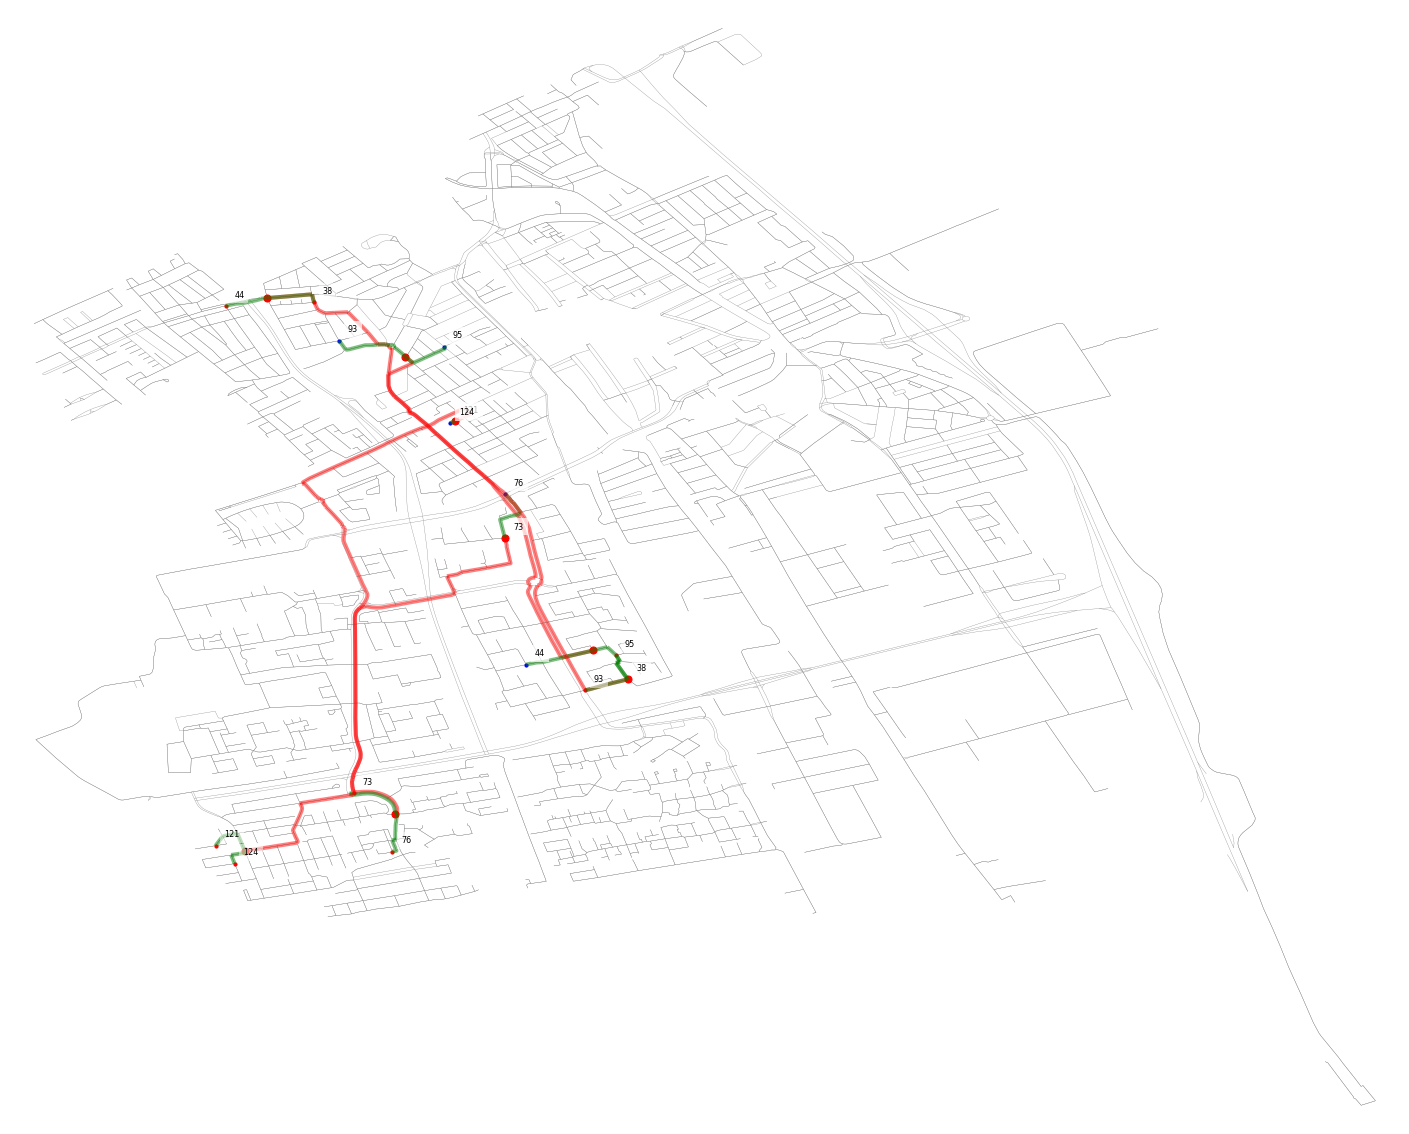

In [62]:
fig, ax = None, None
for indeks in [208, 429, 220, 237]:
    tr = transitized_rides.loc[indeks]
    transitized_rm[transitized_rm.ride == tr.name].origin.to_list()
    tr['origins'] = transitized_rm[transitized_rm.ride == tr.name].origin.to_list()
    tr['destinations'] = transitized_rm[transitized_rm.ride == tr.name].destination.to_list()
    fig, ax = plot_ride(inData,tr, fig = fig, ax = ax)

In [50]:
inData.rides1.index[-3]

5719

In [54]:
inData.rides1

indexes       u_pax  u_veh  kind  \
0                                [0]    5.770479    369     1   
1                                [1]    5.496655    343     1   
2                                [2]    9.330497    580     1   
3                                [3]    7.081406    444     1   
4                                [4]   12.339898    803     1   
...                              ...         ...    ...   ...   
5717  [370, 451, 449, 430, 450, 493]  120.219268   2526   100   
5718  [370, 451, 450, 449, 430, 493]  120.219268   2526   100   
5719  [370, 451, 450, 430, 449, 493]  120.219268   2526   100   
5720  [370, 451, 430, 449, 450, 493]  120.219268   2526   100   
5721  [370, 451, 430, 450, 449, 493]  120.219268   2526   100   

                                                u_paxes  \
0                                   [5.770478857988913]   
1                                   [5.496655132317522]   
2                                   [9.330496505802822]   
3                                   [7.081405812305968]   
4                                  [12.339897968364461]   
...                                                 ...   
5717  [22.97331385192601, 19.57626415886738, 19.3773...   
5718  [22.97331385192601, 19.57626415886738, 19.8986...   
5719  [22.97331385192601, 19.57626415886738, 19.8986...   
5720  [22.97331385192601, 19.57626415886738, 21.1103...   
5721  [22.97331385192601, 19.57626415886738, 21.1103...   

                                                  times  \
0                                              [0, 369]   
1                                              [0, 343]   
2                                              [0, 580]   
3                                             [60, 444]   
4                                             [60, 803]   
...                                                 ...   
5717  [2773.0, 814, 0, 0, 0, 412, 689, 183, 46, 14, ...   
5718  [2773.0, 814, 0, 0, 0, 412, 689, 183, 46, 14, ...   
5719  [2773.0, 814, 0, 0, 0, 412, 689, 183, 46, 14, ...   
5720  [2773.0, 814, 0, 0, 0, 412, 689, 183, 46, 14, ...   
5721  [2773.0, 814, 0, 0, 0, 412, 689, 183, 46, 14, ...   

                        indexes_orig                    indexes_dest  degree  \
0                                [0]                             [0]       1   
1                                [1]                             [1]       1   
2                                [2]                             [2]       1   
3                                [3]                             [3]       1   
4                                [4]                             [4]       1   
...                              ...                             ...     ...   
5717  [370, 451, 449, 430, 450, 493]  [370, 449, 430, 451, 450, 493]       6   
5718  [370, 451, 450, 449, 430, 493]  [370, 449, 430, 451, 450, 493]       6   
5719  [370, 451, 450, 430, 449, 493]  [370, 449, 430, 451, 450, 493]       6   
5720  [370, 451, 430, 449, 450, 493]  [370, 449, 430, 451, 450, 493]       6   
5721  [370, 451, 430, 450, 449, 493]  [370, 449, 430, 451, 450, 493]       6   

      index  PassHourTrav_ns  selected  \
0         0              369         1   
1         1              343         1   
2         2              580         1   
3         3              444         0   
4         4              803         0   
...     ...              ...       ...   
5717   5717             8173         0   
5718   5718             8173         0   
5719   5719             8173         1   
5720   5720             8173         0   
5721   5721             8173         0   

                                                origins  \
0                                          [7904736930]   
1                                          [4997776949]   
2                                            [46369870]   
3                                          [2004745634]   
4                                            [46437613]   
...       

AttributeError: 'numpy.int64' object has no attribute 'origins'

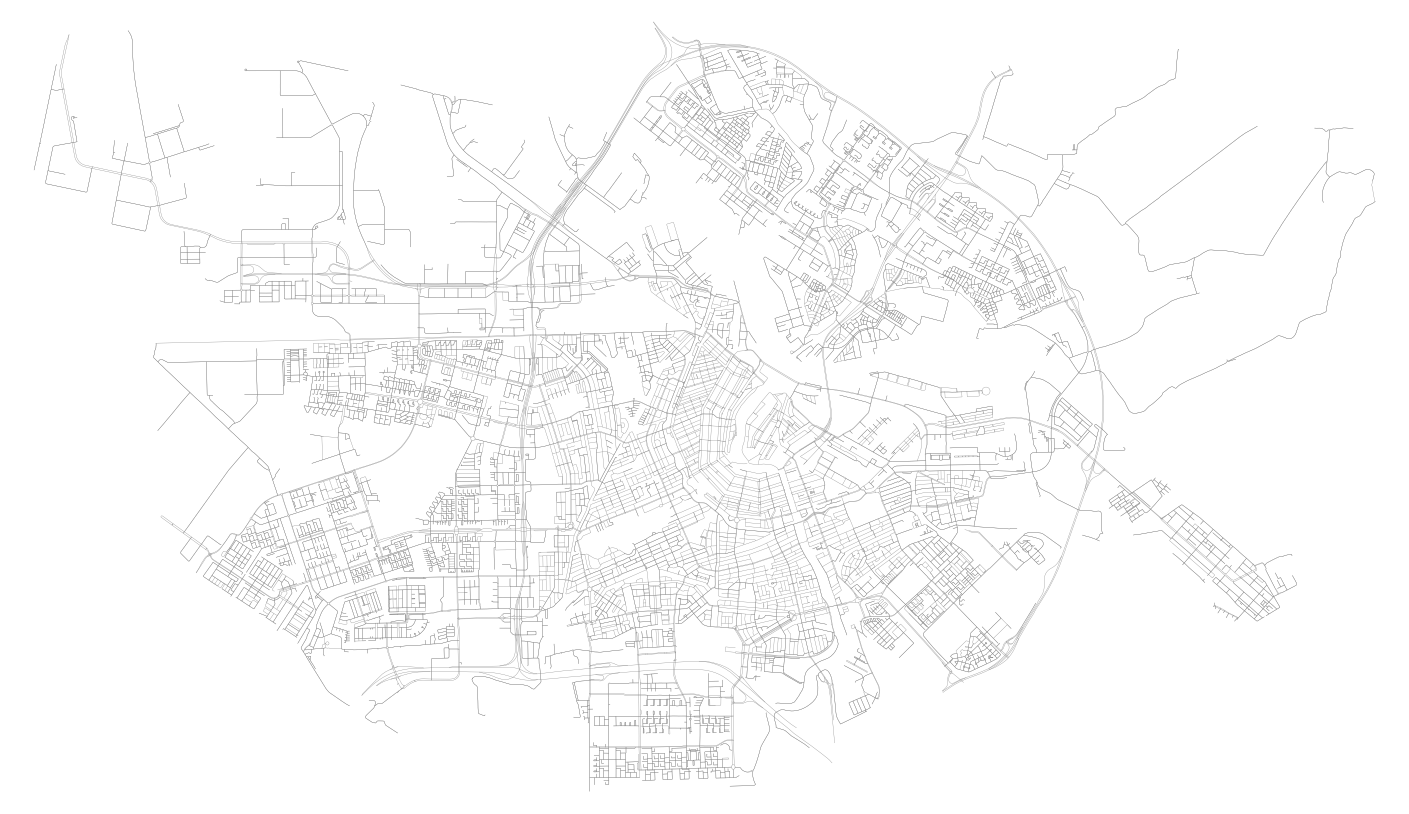

In [51]:
fig, ax = plot_ride(inData,inData.rides1.index[-2])

In [ ]:
indeksy = [208, 429, 220, 237]

In [48]:
transitized_rides = pd.read_csv('ExMAS/data/transits/vis/transitized_rides.csv', index_col = 0)
for col in ['indexes']:
        transitized_rides[col] = transitized_rides[col].apply(lambda x: json.loads(x))
transitized_rm = pd.read_csv('ExMAS/data/transits/vis/transitized_rm.csv', index_col = 0)
second_level_rides = read_lists(pd.read_csv('ExMAS/data/transits/vis/second_level_rides.csv', index_col = 0))

In [17]:
ride = second_level_rides.iloc[-1]
ride

indexes                        [44, 38, 76, 73, 124, 121, 95, 93]
u_pax                                                   19.615456
u_veh                                                        1310
kind                                                           40
u_paxes         [5.510382352941177, 4.637676470588236, 5.19526...
times                    [552.0, 493, 93, 286, 37, 162, 119, 120]
indexes_orig                                 [208, 429, 221, 237]
indexes_dest                                 [208, 429, 221, 237]
degree                                                        NaN
index                                                         318
origins                                                       NaN
destinations                                                  NaN
deps                                                          NaN
dep_deltas                                                    NaN
treqs                                                         NaN
delays    

In [10]:
inData.sblts.requests = pd.read_csv('ExMAS/data/transits/vis/requests.csv', index_col = 0)
inData.sblts.rides = pd.read_csv('ExMAS/data/transits/vis/first_level_rides.csv', index_col = 0)
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    inData.sblts.rides[col] = inData.sblts.rides[col].apply(lambda x: json.loads(x))
inData.sblts.rides = inData.sblts.rides.apply(pd.to_numeric, errors='ignore')

In [12]:
inData.sblts.rides

indexes      u_pax  u_veh  kind  \
0                [0]  11.879246    728     1   
1                [1]   6.178733    401     1   
2                [2]   3.683071    235     1   
3                [3]   6.276251    447     1   
4                [4]   6.646736    427     1   
..               ...        ...    ...   ...   
431      [16, 9, 15]  17.484171    488    30   
432  [134, 142, 143]  20.299114    813    31   
433     [30, 44, 38]  18.079418    523    30   
434  [113, 111, 118]  30.074837    975    31   
435  [169, 176, 187]  14.147330    642    30   

                                               u_paxes  \
0                                 [11.879246408795426]   
1                                  [6.178732648262328]   
2                                  [3.683071375436255]   
3                                  [6.276250814344735]   
4                                  [6.646736105017495]   
..                                                 ...   
431  [6.192816159108688, 5.447925336050128, 5.84342...   
432  [10.778295240021706, 5.49829126803606, 4.02252...   
433  [5.910120436364004, 6.361613285989439, 5.80768...   
434  [11.04268202381439, 9.798932946276164, 9.23322...   
435  [6.560002679300987, 3.9939949105048598, 3.5933...   

                                times     indexes_orig     indexes_dest  \
0                            [0, 728]              [0]              [0]   
1                            [5, 401]              [1]              [1]   
2                           [35, 235]              [2]              [2]   
3                           [41, 447]              [3]              [3]   
4                           [45, 427]              [4]              [4]   
..                                ...              ...              ...   
431       [84.0, 35, 16, 369, 35, 33]      [16, 9, 15]      [16, 9, 15]   
432   [1138.0, 46, 102, 285, 22, 358]  [134, 142, 143]  [143, 142, 134]   
433      [302.5, 14, 50, 355, 31, 73]     [30, 44, 38]     [44, 30, 38]   
434    [926.0, 47, 31, 619, 156, 122]  [113, 111, 118]  [118, 111, 113]   
435  [1415.5, 159, 175, 106, 150, 52]  [169, 176, 187]  [176, 169, 187]   

     degree  index                               origins  \
0         1      0                          [1435362531]   
1         1      1                          [1448535742]   
2         1      2                          [1391417418]   
3         1      3                            [44724090]   
4         1      4                          [1608998214]   
..      ...    ...                                   ...   
431       3    431     [44838049, 503608204, 4552156190]   
432       3    432  [2527832781, 1460714944, 1435362515]   
433       3    433       [630748795, 44856852, 44857685]   
434       3    434        [44796081, 44809060, 44815353]   
435       3    435    [44717858, 1608998204, 3452839333]   

                           destinations                      deps  \
0                          [1668136728]                       [0]   
1                          [1391417166]                       [5]   
2                            [44813589]                      [35]   
3                           [385474972]                      [41]   
4                           [599022490]                      [45]   
..                                  ...                       ...   
431  [3377240340, 4349049085, 44817942]      [84.0, 119.0, 135.0]   
432  [4217813223, 1569646491, 44721735]  [1138.0, 1184.0, 1286.0]   
433      [44763561, 44757287, 44759522]     [302.5, 316.5, 366.5]   
434   [1570984994, 643586570, 44769961]    [926.0, 973.0, 1004.0]   
435    [44806814, 44832709, 1436427159]  [1415.5, 1574.5, 1749.5]   

                                            dep_deltas             treqs  \
0                                                [0.0]               [0]   
1                                                [0.0]               [5]   
2                                                [0.0]      

In [72]:
inData.sblts.requests = pd.read_csv('ExMAS/data/transits/vis/second_level_requests.csv', index_col = 0)
inData.sblts.rides = pd.read_csv('ExMAS/data/transits/vis/second_level_rides.csv', index_col = 0)
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    inData.sblts.rides[col] = inData.sblts.rides[col].apply(lambda x: json.loads(x))

In [89]:
ride = inData.sblts.rides.iloc[-1]
ride

level_0                                                       318
indexes                        [44, 38, 76, 73, 124, 121, 95, 93]
u_pax                                                   19.615456
u_veh                                                        1310
kind                                                           40
u_paxes         [5.510382352941177, 4.637676470588236, 5.19526...
times                    [552.0, 493, 93, 286, 37, 162, 119, 120]
indexes_orig                                 [208, 429, 221, 237]
indexes_dest                                 [208, 429, 221, 237]
degree                                                        NaN
index                                                         318
origins                                                       NaN
destinations                                                  NaN
deps                                                          NaN
dep_deltas                                                    NaN
treqs     

[208, 429, 221, 237]


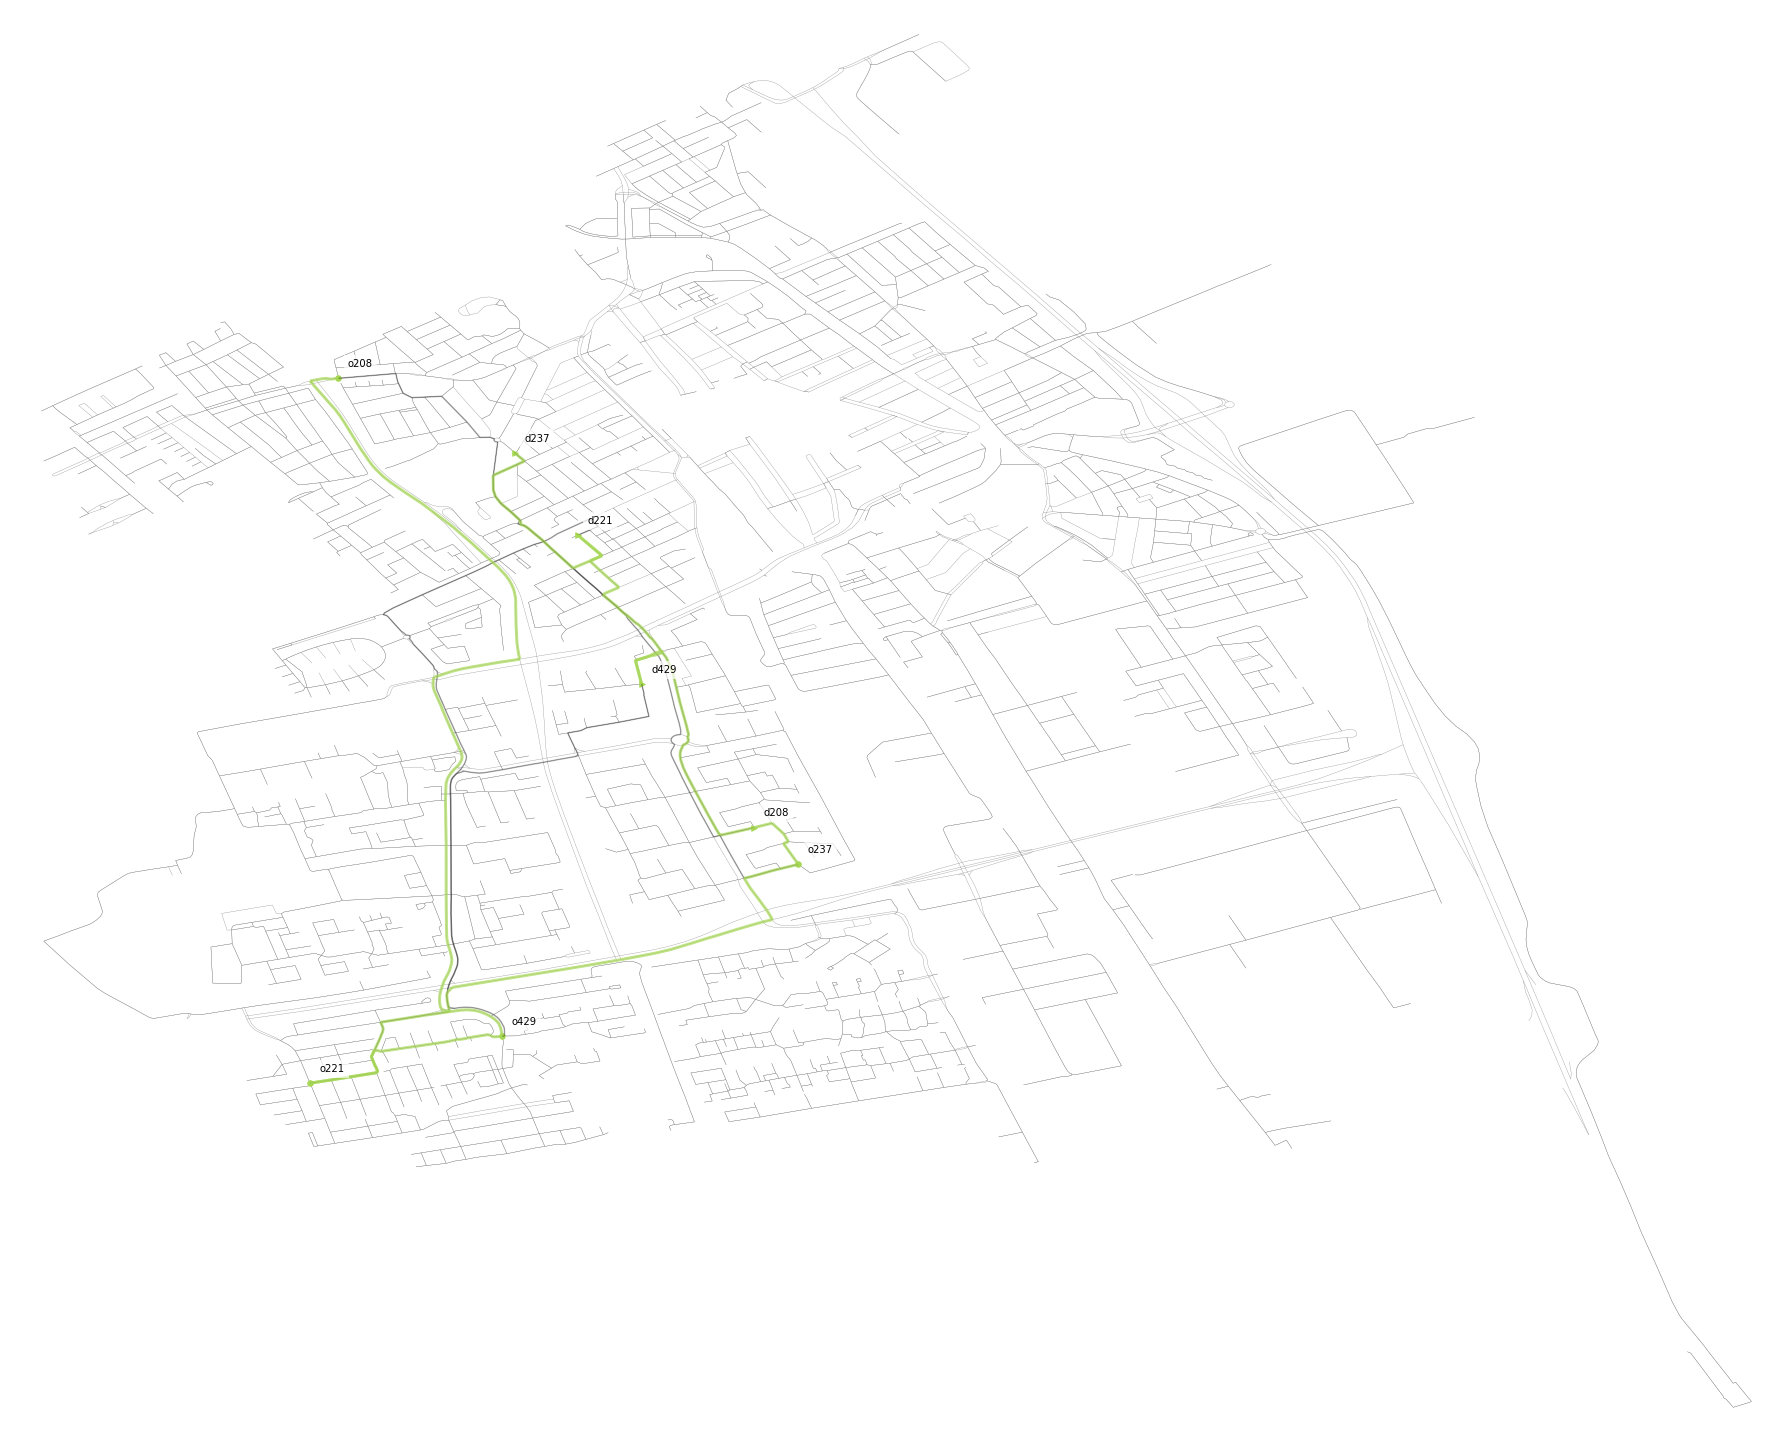

In [91]:
plot_map_rides(inData,[ride.name], light = False)

In [ ]:
requests = pd.read_csv('ExMAS/data/transits/vis/requests.csv', index_col = 0)
requests = pd.read_csv('ExMAS/data/transits/300/requests.csv', index_col = 0)
r2 = pd.read_csv('ExMAS/data/transits/300/rides2.csv', index_col = 0)
del requests['index']
rm = pd.read_csv('ExMAS/data/transits/300/transit_rm.csv')
rm['pax_id'] = rm['Unnamed: 0']
del rm['Unnamed: 0']

In [170]:
transitizables = pd.read_csv('ExMAS/data/transits/tranisitizables.csv', index_col=0)
transitizables["low_level_indexes"] = transitizables["low_level_indexes"].apply(lambda x: json.loads(x))
transitizables

origin  destination  treq  ttrav  \
102   643587012   4349049067  1059    338   
121  1508490990   1668136725   869    461   
127    44898446   4349049085  1089    347   
141  1413911066   1435362416  1204    452   
152    44798698   1830058778  1190    486   

                                                    df  efficient  \
102      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
121      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
127      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
141      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
152      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   

     transitizable  dist   indexes indexes_set unmergables  pax_id  \
102           True  2704  [43, 57]    {57, 43}          []     102   
121           True  3688  [33, 38]    {33, 38}          []     121   
127           True  2776  [61, 62]    {61, 62}          []     127   
141           True  3616  [75, 87]    {75, 87}          []     141   
152           True  3888  [67, 84]    {67, 84}          []     152   

    low_level_indexes  
102          [43, 57]  
121          [33, 38]  
127          [61, 62]  
141          [75, 87]  
152          [67, 84]

In [171]:
r2.sample(2)

Unnamed: 0          indexes     u_pax  u_veh  kind  \
32          32  [141, 127, 152]  16.96725   1688    30   
7            7       [121, 141]  13.09040   1714    20   

                                 u_paxes                              times  \
32  [6.5831, 3.9038500000000003, 6.4803]  [1037.0, 234, 455, 171, 215, 613]   
7                     [6.18355, 6.90685]             [848.0, 392, 711, 596]   

       indexes_orig     indexes_dest  degree  index  
32  [141, 127, 152]  [127, 141, 152]     NaN     32  
7        [121, 141]       [121, 141]     2.0      7

In [173]:
sum(transitizables.loc[[121, 102]].low_level_indexes.to_list(),[])

[33, 38, 43, 57]

In [177]:
r2['indexes'] = r2.apply(lambda x: sum(transitizables.loc[x.indexes].low_level_indexes.to_list(),[]), axis = 1)

((189, 18), (155, 18), (34, 11))

In [42]:
from ExMAS.main import matching

In [154]:
r1 = pd.read_csv('ExMAS/data/transits/rides1.csv')
r1.treqs = r1.treqs.apply(lambda x: x.replace("  "," "))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[ ","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[\n","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace(" ",","))
r2 = pd.read_csv('ExMAS/data/transits/rides2.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    print(col)
    r2[col] = r2[col].apply(lambda x: json.loads(x))
transitizable = pd.read_csv('ExMAS/data/transits/tranisitizables.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times','origins','destinations','deps','dep_deltas', 'ttravs','treqs']:
    print(col)
    r1[col] = r1[col].apply(lambda x: json.loads(x))


indexes
indexes_dest
indexes_orig
u_paxes
times
indexes
indexes_dest
indexes_orig
u_paxes
times
origins
destinations
deps
dep_deltas
ttravs
treqs


In [203]:
import pprint
pprint.pprint(params)

{'PT_discount': DotMap(),
 'VoT': 0.0035,
 'WtS': 1.3,
 'avg_speed': 8,
 'city': 'Delft, Netherlands',
 'delay_value': 1.5,
 'demand_structure': {'destinations_dispertion': -0.001,
                      'origins_dispertion': -0.0003,
                      'temporal_dispertion': 0.3,
                      'temporal_distribution': 'uniform'},
 'dist_threshold': 100000,
 'fare': DotMap(),
 'horizon': 1200,
 'matching_obj': 'u_veh',
 'max_degree': 8,
 'mode_choice_beta': -0.5,
 'nP': 100,
 'paths': {'G': 'ExMAS/data/graphs/Delft.graphml',
           'albatross': 'ExMAS/data/albatross',
           'data': 'ExMAS/data',
           'main': 'ExMAS',
           'params': 'ExMAS/data/configs',
           'postcodes': 'ExMAS/data/postcodes/PC4_Nederland_2015.shp',
           'skim': 'ExMAS/data/graphs/Delft.csv'},
 'pax_delay': 15,
 'price': 1.5,
 'profitability': False,
 's2s_discount': 0.6,
 'shared_discount': 0.3,
 'simTime': 0.2,
 'speeds': DotMap(ride=8, walk=1.2),
 't0': Timestamp('2021-06-

In [192]:
inData.sblts.rides = pd.concat([r1,r2])
inData.sblts.rides.shape, r1.shape, r2.shape

((189, 18), (155, 18), (34, 11))

In [180]:
inData.sblts.rides = pd.concat([r1,r2])
inData = matching(inData, params, make_assertion = False)

07-06-21 16:13:41-INFO-Matching 100 trips to 189 rides in order to min u_veh
07-06-21 16:13:41-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,190 
reduced by matching to:               28,367


ValueError: 43 is not in list

In [25]:
r2

indexes     u_pax  u_veh  kind               u_paxes        times  \
0     [0]  1.371750    372     1             [1.37175]   [735, 372]   
1     [1]  1.371750    372     1             [1.37175]   [735, 372]   
2     [2]  1.290625    350     1  [1.2906250000000001]   [856, 350]   
3     [3]  1.084125    294     1            [1.084125]  [1268, 294]   
4     [4]  1.062000    288     1               [1.062]  [1268, 288]   

  indexes_orig indexes_dest  degree  index  
0          [0]          [0]       1      0  
1          [1]          [1]       1      1  
2          [2]          [2]       1      2  
3          [3]          [3]       1      3  
4          [4]          [4]       1      4

In [24]:
inData = ExMAS.utils.generate_demand(inData, params)
inData = ExMAS.main(inData, params, plot=False)

07-06-21 13:58:50-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 13:58:50-INFO-creating combinations
DotMap()
07-06-21 13:58:50-INFO-9900	 nR*(nR-1)
07-06-21 13:58:50-INFO-Reduction of feasible pairs by 98.94%
07-06-21 13:58:50-INFO-Degree 2 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 2 : 280
07-06-21 13:58:51-INFO-At degree 2 feasible extensions found out of 25 searched
07-06-21 13:58:51-INFO-Degree 3 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 3 : 25
07-06-21 13:58:51-INFO-At degree 3 feasible extensions found out of 0 searched
07-06-21 13:58:51-INFO-Degree 4 	Completed
07-06-21 13:58:51-INFO-No more trips to exted at degree 4
07-06-21 13:58:51-INFO-Matching 100 trips to 405 rides in order to min u_veh
07-06-21 13:58:51-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,371 
reduced by matching to:               26,616
07-06-21 13:58:51-INFO-Calculations  completed
07-06-21 13:58:51-INFO-DotMap(V

In [11]:
df = transits[transits['efficient']]
df['low_level_indexes'] = df.apply(lambda x: rm[rm.ride==x.name].pax_id.to_list(),axis = 1)
df['pax_id'] = df.index.copy()

In [12]:
inData.requests = requests
inData.requests.treq = requests.treq.apply(lambda x: pd.to_datetime(x,unit = 's'))
inData.requests.ttrav = requests.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [13]:
df = transits[transits['efficient']]

In [14]:
df['indexes_set'] = df.apply(lambda x: set(rm[rm.ride== x.name].pax_id.to_list()), axis =1)
df['indexes'] = df.apply(lambda x: rm[rm.ride== x.name].pax_id.to_list(), axis =1)

In [15]:
df['pax_id'] = df.index.copy()
df = df.reset_index()
df['dist'] = df.apply(lambda x: inData.skim.loc[x.origin, x.destination], axis= 1)
df['treq'] = df['treq'].apply(lambda x: pd.to_datetime(x,unit = 's'))
df['ttrav'] = df.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [19]:
df

origin   destination  dep  ttrav  \
333  2.381861e+09  6.435866e+08  NaN  327.0   
340  4.487323e+07  6.260100e+08  NaN  370.0   
353  5.273788e+08  4.481310e+07  NaN  303.0   
357  5.273788e+08  4.481310e+07  NaN  303.0   
361  1.576746e+09  4.481360e+07  NaN  521.0   
..            ...           ...  ...    ...   
814  1.570983e+09  1.580652e+09  NaN  564.0   
816  4.473010e+07  1.391417e+09  NaN  550.0   
819  4.472612e+07  1.620328e+09  NaN  572.0   
834  4.473157e+07  4.846026e+09  NaN  527.0   
849  4.473157e+07  4.846026e+09  NaN  527.0   

                                                    df  efficient  \
333       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
340       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
353       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
357       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
361       ride  exp_u_private  exp_u_d2d  ...  exp_...       True   
..                                                 ...        ...   
814      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
816      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
819      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
834      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   
849      ride  exp_u_private  exp_u_d2d  ...  exp_u...       True   

     transitizable    treq    dist   indexes_set       indexes  
333           True  1233.0  40.875    {224, 267}    [224, 267]  
340           True  1212.0  46.250    {257, 250}    [250, 257]  
353           True   937.0  37.875    {142, 135}    [142, 135]  
357           True   937.0  37.875    {142, 135}    [135, 142]  
361           True   843.0  65.125     {33, 101}     [33, 101]  
..             ...     ...     ...           ...           ...  
814           True   787.0  70.500      {44, 76}      [44, 76]  
816           True   819.0  68.750      {88, 44}      [44, 88]  
819           True   766.0  71.500      {65, 44}      [44, 65]  
834           True   819.0  65.875  {88, 65, 44}  [65, 44, 88]  
849           True   819.0  65.875  {88, 65, 44}  [44, 65, 88]  

[68 rows x 11 columns]

In [16]:
df.dist

333    40.875
340    46.250
353    37.875
357    37.875
361    65.125
        ...  
814    70.500
816    68.750
819    71.500
834    65.875
849    65.875
Name: dist, Length: 68, dtype: float64

In [16]:
def unmergables(row):
    # returns list of all the subgroup indiced contained in a ride
    return df[df.indexes_set.apply(lambda x: len(x.intersection(row.indexes_set)))>0].index.to_list()
df['unmergables'] = df.apply(unmergables, axis=1)
df.unmergables = df.apply(lambda m: [x for x in m.unmergables if x != m.name], axis = 1)

In [26]:
unmergables = list()
for i,row in df.iterrows():
    [unmergables.append((row.name,_)) for _ in row.unmergables]
inData.unmergables = unmergables

In [19]:
params.shared_discount = 0.5

In [24]:
params.VoT_std = False

In [29]:
inData.requests = df

In [31]:
from ExMAS.main import pairs, single_rides, init_log
params.check = False
inData.logger = init_log(params)  # initialize console logger
inData = single_rides(inData, params) # prepare requests as a potential single rides
r = pairs(inData,params)

07-06-21 11:31:06-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 11:31:06-INFO-creating combinations
07-06-21 11:31:07-INFO-Removing 220 unmergable pairs from the solution of 4556
07-06-21 11:31:07-INFO-4336	 nR*(nR-1)
07-06-21 11:31:08-CRITICAL-FIFO pairs assertion failed
07-06-21 11:31:08-WARNING-           origin_i  destination_i  ttrav_i  treq_i     delta_i  dist_i  \
i  j                                                                      
36 21  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   24  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   26  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
3  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
4  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769   

AssertionError: 

In [19]:
inData.unmergables

DotMap()

In [17]:
inData = ExMAS.main(inData, params, plot=False)

04-06-21 16:48:54-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
04-06-21 16:48:54-INFO-creating combinations
04-06-21 16:48:54-INFO-9900	 nR*(nR-1)
04-06-21 16:48:55-INFO-Reduction of feasible pairs by 98.67%
04-06-21 16:48:55-INFO-Degree 2 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 2 : 325
04-06-21 16:48:55-INFO-At degree 2 feasible extensions found out of 59 searched
04-06-21 16:48:55-INFO-Degree 3 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 3 : 59
04-06-21 16:48:55-INFO-At degree 3 feasible extensions found out of 9 searched
04-06-21 16:48:55-INFO-Degree 4 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 4 : 9
04-06-21 16:48:55-INFO-At degree 4 feasible extensions found out of 0 searched
04-06-21 16:48:55-INFO-Degree 5 	Completed
04-06-21 16:48:55-INFO-No more trips to exted at degree 5
04-06-21 16:48:56-INFO-Matching 100 trips to 493 rides in order to min u_veh
04-06-21 16:48:56-INFO-Problem solution: Optimal. 
T

In [35]:
inData.sblts.rides

indexes      u_pax u_veh kind  \
0            [0]   3.138000   207    1   
1            [1]   6.122500   401    1   
2            [2]   5.271500   334    1   
3            [3]   8.524500   552    1   
4            [4]   8.524500   552    1   
..           ...        ...   ...  ...   
84    [10, 8, 9]  16.873575  1093   30   
85  [3, 4, 5, 7]  24.889525  1343   40   
86  [4, 3, 5, 7]  24.889525  1343   40   
87  [3, 4, 5, 7]  24.889525  1343   40   
88  [4, 3, 5, 7]  24.889525  1343   40   

                                              u_paxes  \
0                                             [3.138]   
1                                [6.1225000000000005]   
2                                            [5.2715]   
3                                            [8.5245]   
4                                            [8.5245]   
..                                                ...   
84                         [5.93625, 4.711325, 6.226]   
85  [7.374549999999999, 7.3063, 5.7347, 4.47397499...   
86  [7.374549999999999, 7.3063, 5.7347, 4.47397499...   
87  [7.374549999999999, 7.3063, 5.7347, 4.47397499...   
88  [7.374549999999999, 7.3063, 5.7347, 4.47397499...   

                                     times  indexes_orig  indexes_dest  \
0                                 [0, 207]           [0]           [0]   
1                               [165, 401]           [1]           [1]   
2                               [770, 334]           [2]           [2]   
3                               [998, 552]           [3]           [3]   
4                               [998, 552]           [4]           [4]   
..                                     ...           ...           ...   
84         [2857.0, 68, 90, 499, 219, 217]    [10, 8, 9]    [8, 10, 9]   
85  [998.0, 15, 570, 140, 285, 0, 260, 73]  [3, 4, 5, 7]  [3, 4, 5, 7]   
86  [998.0, 15, 570, 140, 285, 0, 260, 73]  [4, 3, 5, 7]  [4, 3, 5, 7]   
87  [998.0, 15, 570, 140, 285, 0, 260, 73]  [3, 4, 5, 7]  [4, 3, 5, 7]   
88  [998.0, 15, 570, 140, 285, 0, 260, 73]  [4, 3, 5, 7]  [3, 4, 5, 7]   

    degree  index  lambda_r  PassHourTrav_ns  \
0      1.0      0  0.800000              207   
1      1.0      1  0.800000              401   
2      1.0      2  0.800000              334   
3      1.0      3  0.800000              552   
4      1.0      4  0.800000              552   
..     ...    ...       ...              ...   
84     NaN     84  0.166921             1312   
85     NaN     85  0.282202             1871   
86     NaN     86  0.282202             1871   
87     NaN     87  0.282202             1871   
88     NaN     88  0.282202             1871   

                                                  row  selected  
0   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1  
1   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1  
2   [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         0  
3   [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         0  
4   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...         0  
..                                                ...       ...  
84  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...         0  
85  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...         0  
86  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...         0  
87  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...         0  
88  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...         0  

[89 rows x 14 columns]

In [40]:
from ExMAS.utils import *

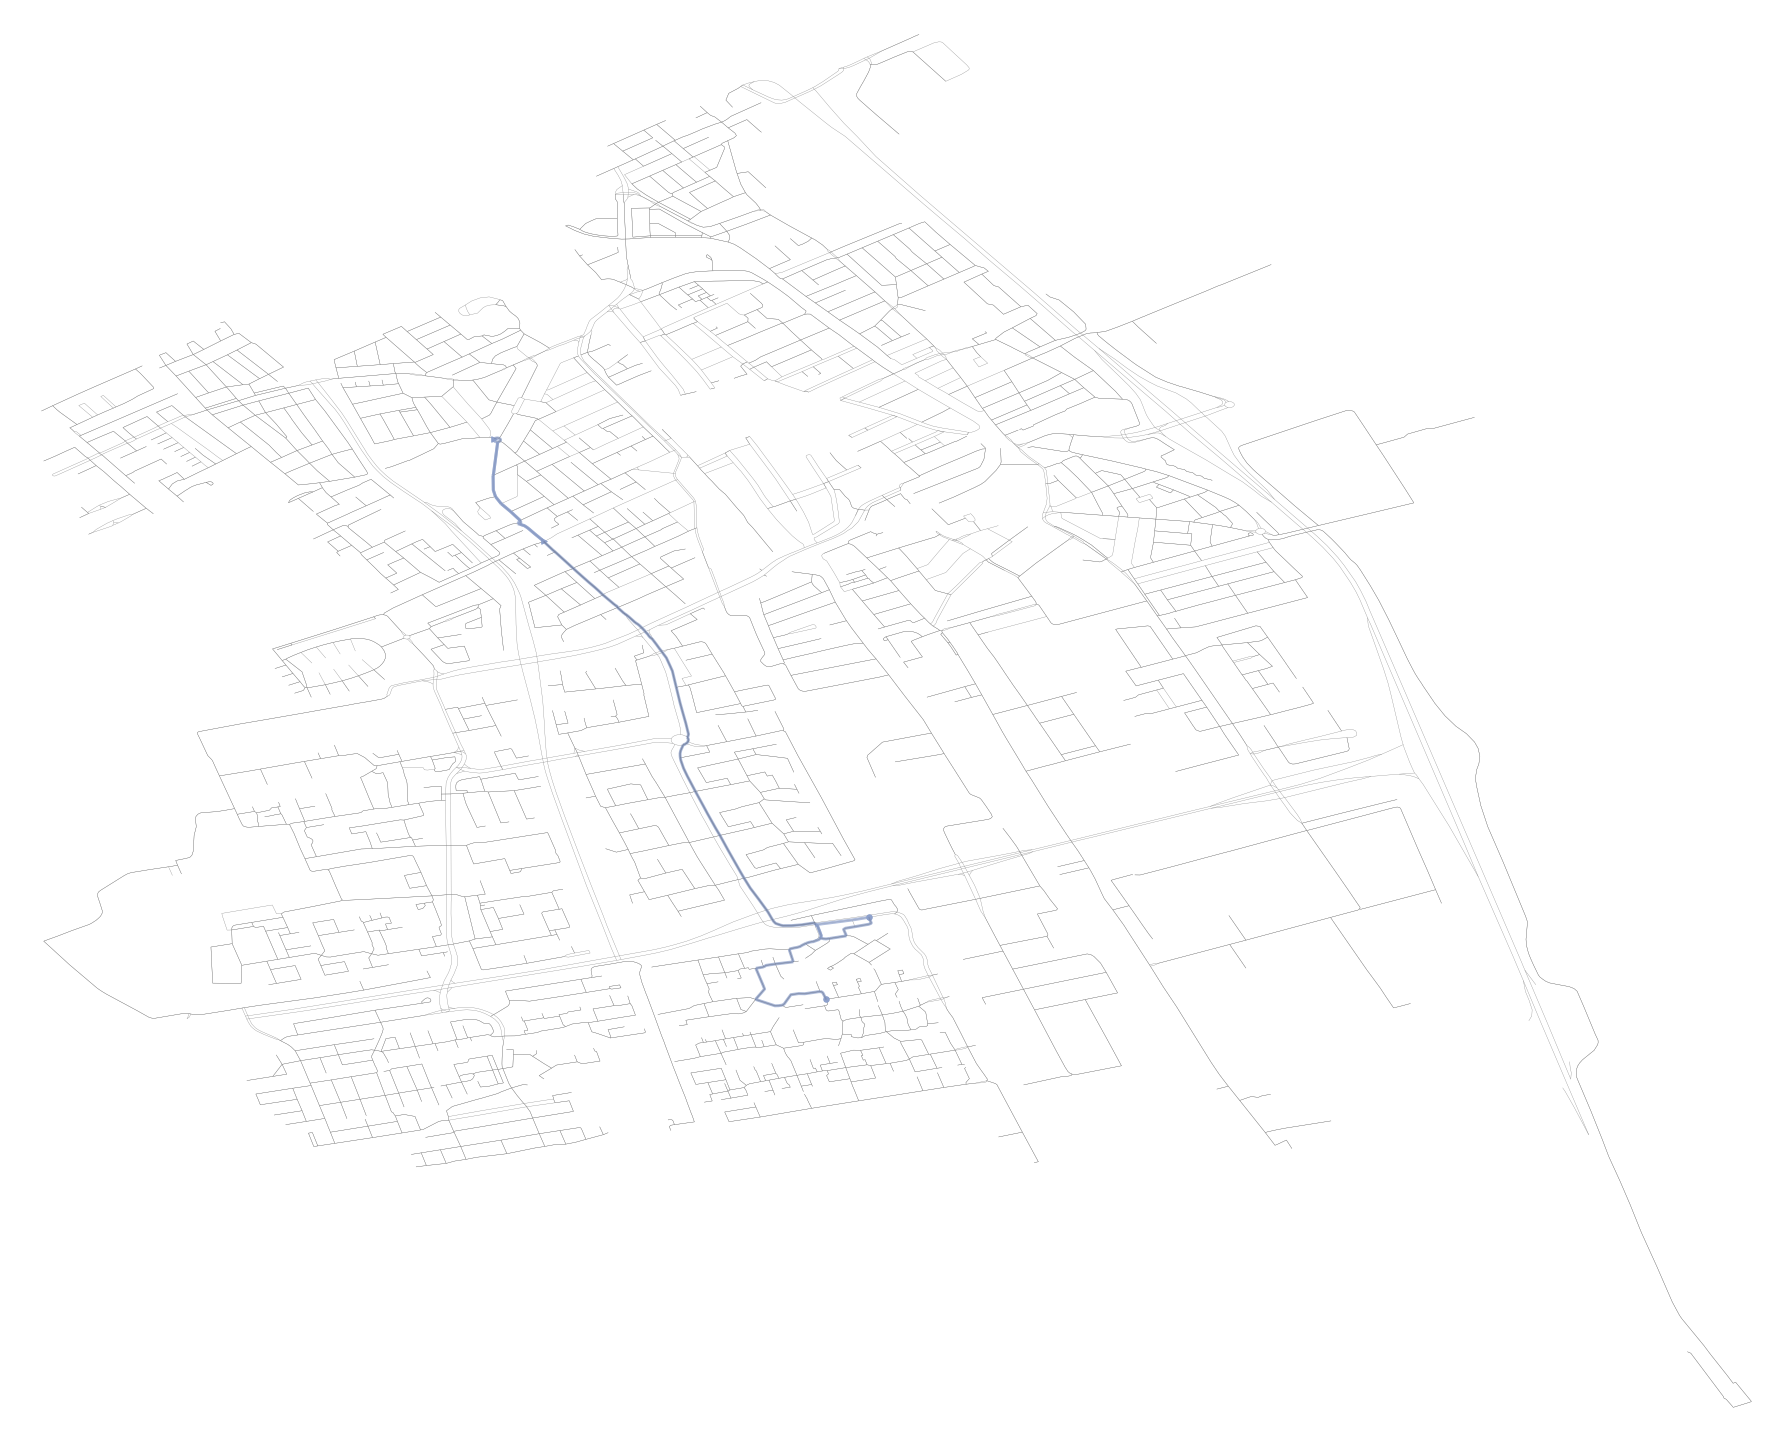

In [43]:
plot_map_rides(inData,[20])